# КТ 1 Анализ данных по продаже билетов авиакомпании

1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


## Навигация:
1. [Познакомимся с данными](#1st)
2. [Осуществим предобработку данных](#2st)
* 2.1. [Приведем все заголовки в нижний регистр](#21st) 
* 2.2. [Изменим типы данных стобцов с датами](#22st)
* 2.3. [Обработаем пропуски](#23st)
* 2.4. [Проверим дубликаты](#24st)
* 2.5. [Исключим нулевые значения в выручке (перепишем датасет без нулевой выручки), также перепишем индексы](#25st)
3. [Исследовательский анализ данных](#3st)
* 3.1. [Создим отчет о динамике продаж (выручке)](#31st) 
* 3.2. [Исследуем выручку, исследуем выбросы](#32st)
* 3.3. [Исследуем сезонность продаж](#33st)
* 3.4. [Проверим гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается](#34st)
* 3.5. [Определим топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ](#35st)
* 3.6. [Определим есть ли зависимость выручки от других признаков. Построим матрицу корреляций.](#36st)
4. [Общие выводы](#4st)

In [60]:
# импортируем библиотеки
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

# <a class="anchor" id="1st"></a> 1. Познакомимся с данными

In [62]:
#Загрузим файл
df = pd.read_csv('air_data.csv', delimiter=';')
df.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [64]:
#Изучим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


### **Выводы:**

1. Заголовки в неудобном виде (в верхнем регистре)   
2. В данных есть пропуски ( в столбцах с индексами  4, 5, 7)
3. Несоответствие типов данных с данными в некоторых столбцах ( в столбцах с индексами 0, 1)

# <a class="anchor" id="2st"></a> 2. Осуществим предобработку данных

### <a class="anchor" id="21st"></a> 2.1. Приведем все заголовки в нижний регистр

In [66]:
df.rename(columns=str.lower, inplace=True)

In [68]:
# Проверим изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   issue_date         50000 non-null  object
 1   flight_date_loc    50000 non-null  object
 2   pax_type           50000 non-null  object
 3   revenue_amount     50000 non-null  int64 
 4   orig_city_code     49998 non-null  object
 5   dest_city_code     49999 non-null  object
 6   route_flight_type  50000 non-null  object
 7   ffp_flag           19398 non-null  object
 8   sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Заголовки приведены в нижний регистр.

### <a class="anchor" id="22st"></a> 2.2. Изменим типы данных стобцов с датами

In [70]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%Y-%m-%d %H:%M:%S')
df['flight_date_loc'] = pd.to_datetime(df['flight_date_loc'], format='%Y-%m-%d %H:%M:%S')

In [72]:
#Проверим изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


Типы данных изменились.

### <a class="anchor" id="23st"></a> 2.3. Обработаем пропуски

In [74]:
#Вычислим сумму пропущенных значений в каждом столбце
df.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

Можно увидеть, что пустые значения есть в столбцах с данными о городах отправления и прибытия, в столбце с данными о наличии программы лояльности. Сначала разберемся с лояльностью: заполним данные исходя из логики "нет данных - не участвует в программе лояльности (0), данные есть - участвует (1)".

In [76]:
# Заменим пропуске в стобце ffp_flag (если есть данные - участвует в программе лояльности (заменим на 1), если нет данных - не участвует в программе лояльности (заменим на 0))
df['ffp_flag'] = df['ffp_flag'].replace('FFP', 1)
df['ffp_flag'] = df['ffp_flag'].fillna(0)

In [78]:
# Посмотрим строки с пропущенными значениями с данными о городах
df[df['orig_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,0.0,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,0.0,OFFLINE


In [80]:
df[df['dest_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,0.0,OFFLINE


Теперь разберемся с городами отправления и прибытия, проверим совпадения.

In [82]:
# Проверим, есть ли совпадения
df[(df['flight_date_loc'] == ('2022-03-22')) & (df['dest_city_code'] == 'KHV') & (df['route_flight_type'] == 'МВЛ')]['orig_city_code'].unique()

array([nan], dtype=object)

In [84]:
df[(df['flight_date_loc'] == ('2022-05-11')) & (df['dest_city_code'] == 'KHV') & (df['route_flight_type'] == 'МВЛ')]['orig_city_code'].unique()

array([nan], dtype=object)

In [86]:
df[(df['flight_date_loc'] == ('2022-07-28')) & (df['orig_city_code'] == 'KHV') & (df['route_flight_type'] == 'МВЛ')]['dest_city_code'].unique()

array([nan], dtype=object)

Совпадений нет, значит просто удаляем строки с пропусками.

In [88]:
# Удалим строки с пропусками
df = df.dropna()

In [90]:
#Проверим, не осталось ли пропущенных значений
df.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

Больше пропусков нет.

### <a class="anchor" id="24st"></a> 2.4. Проверим дубликаты

In [92]:
#Найдем сумму дубликатов данных 
df.duplicated().sum()

169

In [94]:
# Удалим дубликаты
df = df.drop_duplicates()

In [96]:
#Проверим 
df.duplicated().sum()

0

Дубликаты удалены.

### <a class="anchor" id="25st"></a> 2.5. Исключим нулевые значения в выручке (перепишем датасет без нулевой выручки), также перепишем индексы

In [98]:
df = df[df['revenue_amount'] != 0].reset_index(drop=True)

### **Выводы:**

1. Мы привели заголовки к удобному виду (в нижний регистр).
2. Изменили типы данных со временем.
3. Обработали пропуски, теперь их нет.
4. Удалили дубликаты, теперь их тоже нет.
5. Исключили нулевые значения в выручке для дальнейшего исследовния.

# <a class="anchor" id="3st"></a> 3. Исследовательский анализ данных

### <a class="anchor" id="31st"></a> 3.1. Создим отчет о динамике продаж (выручке)

In [100]:
# Cгруппируем данные о средней выручке по дате
date_revenue = df.groupby('issue_date')['revenue_amount'].mean().reset_index()
date_revenue

,issue_date,revenue_amount
0,2021-10-01,372.283951
1,2021-10-02,355.913978
2,2021-10-03,312.000000
3,2021-10-04,350.542169
4,2021-10-05,366.265060
...,...,...
360,2022-09-26,494.000000
361,2022-09-27,537.222222
362,2022-09-28,650.144928
363,2022-09-29,499.272727


Видим, что нам даны данные за год - с 1-го октября 2021 года по 30-го сентября 2022 года.

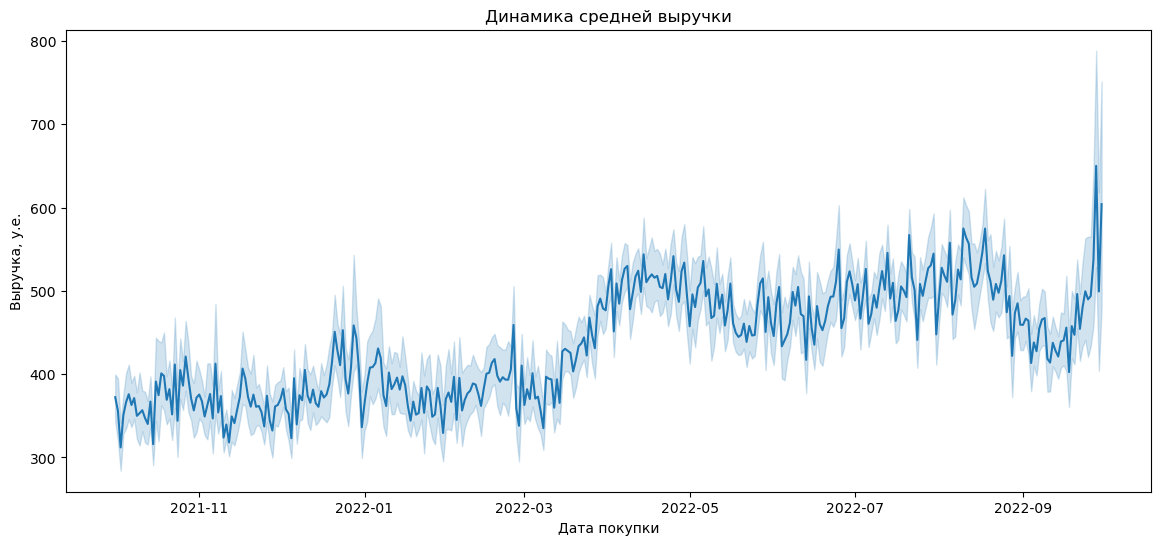

In [102]:
# построим график динамики выручки
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='issue_date', y='revenue_amount').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, у.e.', 
                                                                title='Динамика средней выручки')
plt.show()

Видим, что средняя выручка колеблется в пределах от 300 до 800 у.е. После марта выручка стремительно пошла вверх и закрепилась на более менее стабильной позиции до сентября. В конце сентября можно заметить резкие скачки в выручке.

In [104]:
# сгруппируем данные о выручке по месяцам
month_revenue = df.groupby(df['issue_date'].dt.month)['revenue_amount'].sum().reset_index()
month_revenue

,issue_date,revenue_amount
0,1,1352390
1,2,1347770
2,3,1826430
3,4,2032570
4,5,1713360
5,6,1614500
6,7,2638430
7,8,2471260
8,9,1669310
9,10,1327840


In [106]:
# 10-й месяц 2021 года - первый по хронолигии в датасете, поэтому препишем данные так, чтобы отчет начинался с него
months = {10: 1, 11: 2, 12: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9, 7: 10, 8: 11, 9: 12}
month_revenue['issue_date'] = month_revenue['issue_date'].map(months)
month_revenue

,issue_date,revenue_amount
0,4,1352390
1,5,1347770
2,6,1826430
3,7,2032570
4,8,1713360
5,9,1614500
6,10,2638430
7,11,2471260
8,12,1669310
9,1,1327840


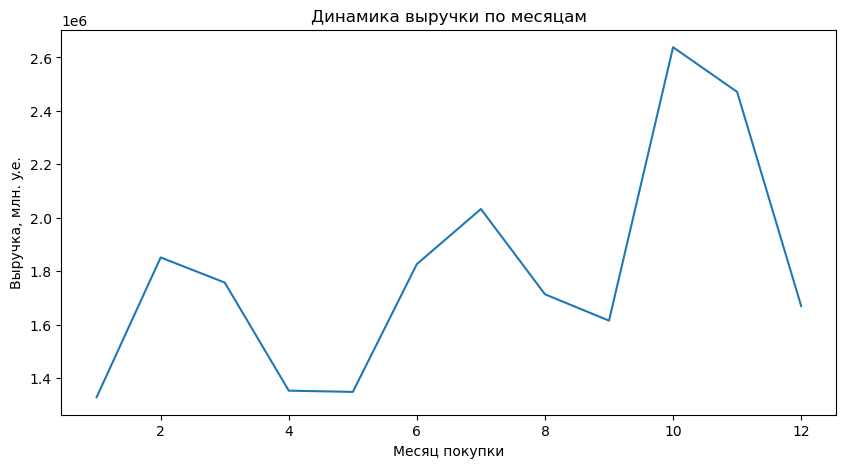

In [108]:
# построим график динамики выручки по месяцам
plt.figure(figsize=(10, 5))
sns.lineplot(data=month_revenue, x='issue_date', y='revenue_amount').set(xlabel='Месяц покупки', 
                                                        ylabel='Выручка, млн. y.e.', 
                                                        title='Динамика выручки по месяцам')
plt.show()

Видим, что суммарная выручка колеблется в пределах от 1,4 до 2,6 млн. у.е. Наибольшая выручка пришлась на июль, а наименьшая - на октябрь, январь, февраль. После резкого подьема в июле в сентябре выручка также резко сократилась.

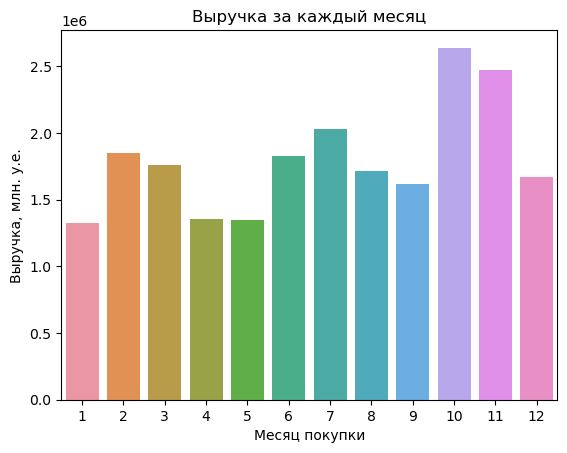

In [110]:
# построим столбчатую диаграмму объема выручки по месяцям
sns.barplot(data=month_revenue, x='issue_date', y='revenue_amount').set(xlabel='Месяц покупки', 
                                                                ylabel='Выручка, млн. у.е.', 
                                                                title='Выручка за каждый месяц')
plt.show()

Видим, что наибольшую выручку мы получили за июль, на втором месте по величине выручки - август; наименьшую выручку мы получили за октябрь. Также можно заметить, что выручка за январь и февраль тоже одни из наименьших, являясь не намного выше выручки за октябрь.

In [112]:
# Cгруппируем данные о средней выручке c датедетализацией по полю ffp_flag
date_revenue_ffp = df.groupby([df['issue_date'], 'ffp_flag'])['revenue_amount'].mean().reset_index()
date_revenue_ffp

,issue_date,ffp_flag,revenue_amount
0,2021-10-01,0.0,360.000000
1,2021-10-01,1.0,395.535714
2,2021-10-02,0.0,362.413793
3,2021-10-02,1.0,345.142857
4,2021-10-03,0.0,328.947368
...,...,...,...
725,2022-09-28,1.0,759.545455
726,2022-09-29,0.0,523.095238
727,2022-09-29,1.0,422.307692
728,2022-09-30,0.0,648.333333


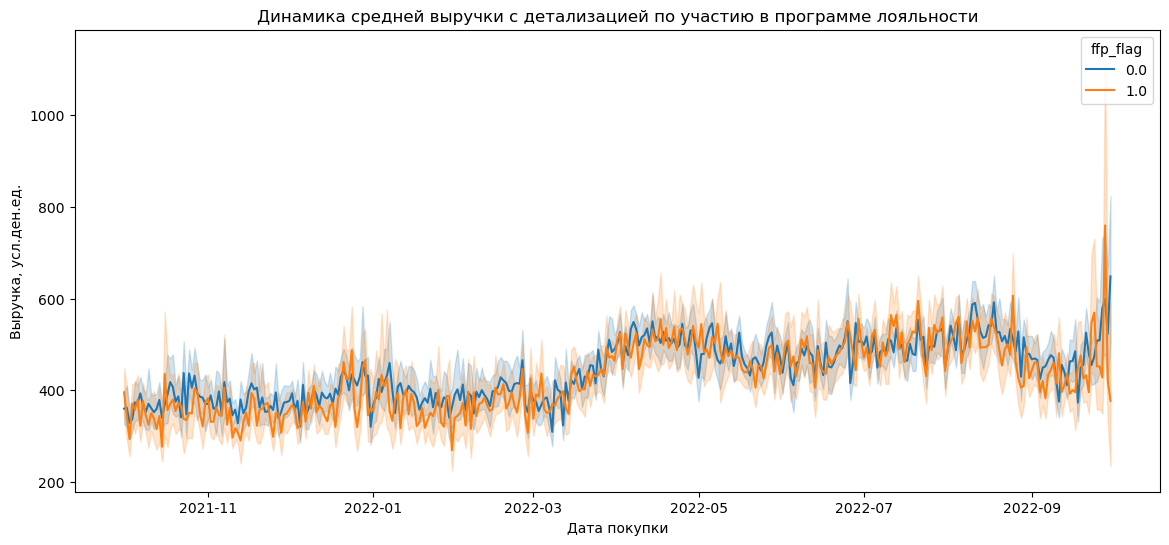

In [114]:
# построим график динамики выручки с детализацией по участию в программе лояльности
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='issue_date', y='revenue_amount', hue='ffp_flag').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, усл.ден.ед.', 
                                                                title='Динамика средней выручки с детализацией по участию в программе лояльности')
plt.show()

Видим, что средние выручки по этим двум группам клиентов (участвующие и не участвующие в программе лояльности) колеблются в пределах от 200 до 1000 у.е. Также можно заметить резкие скачки в конце сентября: выручка от клиентов, участвующих в программе лояльности, резко падает, а от неучаствующих - немного растет.

In [116]:
# сгруппируем данные о выручке c датедетализацией по полю ffp_flag по месяцам
month_revenue_ffp = df.groupby([df['issue_date'].dt.month, 'ffp_flag'])['revenue_amount'].sum().reset_index()
month_revenue_ffp['issue_date'] = month_revenue_ffp['issue_date'].map(months)
month_revenue_ffp

,issue_date,ffp_flag,revenue_amount
0,4,0.0,813850
1,4,1.0,538540
2,5,0.0,848530
3,5,1.0,499240
4,6,0.0,1025070
5,6,1.0,801360
6,7,0.0,1267690
7,7,1.0,764880
8,8,0.0,1063840
9,8,1.0,649520


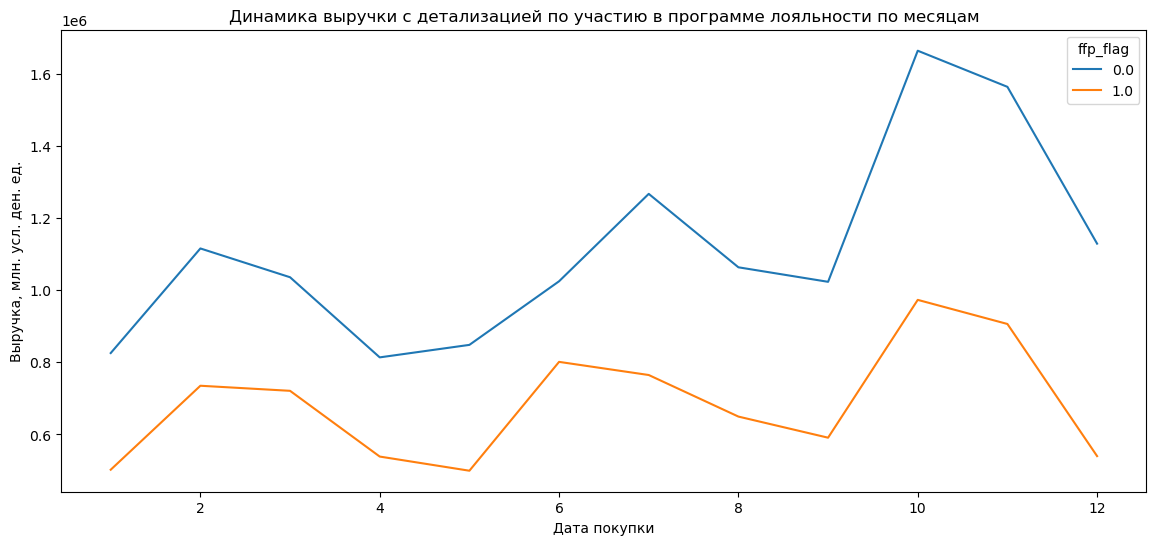

In [118]:
# построим график динамики выручки с детализацией по участию в программе лояльности по месяцам
plt.figure(figsize=(14, 6))
sns.lineplot(data=month_revenue_ffp, x='issue_date', y='revenue_amount', hue='ffp_flag').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, млн. усл. ден. ед.', 
                                                                title='Динамика выручки с детализацией по участию в программе лояльности по месяцам')
plt.show()

Видим, что выручка по группе клиентов, участвующих в программе лояльности, колеблется в пределах от 0,4 до 1 млн. у.е., а по группе клиентов, не участвующих в программе лояльности - от 0,8 до 1,8 млн. у.е. Получается, что выручка от группы клиентов, не участвующих в программе лояльности, больше.

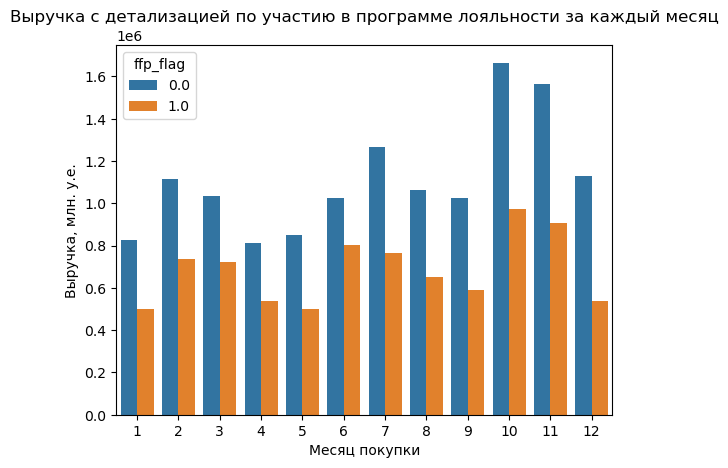

In [120]:
# построим столбчатую диаграмму объема выручки с детализацией по участию в программе лояльности по месяцям
sns.barplot(data=month_revenue_ffp, x='issue_date', y='revenue_amount', hue='ffp_flag').set(xlabel='Месяц покупки', 
                                                                ylabel='Выручка, млн. у.е.', 
                                                                title='Выручка с детализацией по участию в программе лояльности за каждый месяц')
plt.show()

Видим, что наибольшая выручка была получена за июль (по обеим группам), а наименьшая - за февраль (для участников лояльности) и за январь (для не участников программы лояльности). Также для группы клиентов, участвующих в программе лояльности, низкая выручка наблюдалась в октябрь, январь и август, они все примерно одинаково низкие.

In [122]:
# Cгруппируем данные о средней выручке c датедетализацией по полю route_flight_type
date_revenue_route = df.groupby([df['issue_date'], 'route_flight_type'])['revenue_amount'].mean().reset_index()
date_revenue_route

,issue_date,route_flight_type,revenue_amount
0,2021-10-01,ВВЛ,336.102941
1,2021-10-01,МВЛ,561.538462
2,2021-10-02,ВВЛ,330.000000
3,2021-10-02,МВЛ,530.833333
4,2021-10-03,ВВЛ,275.957447
...,...,...,...
716,2022-09-28,МВЛ,1343.000000
717,2022-09-29,ВВЛ,436.078431
718,2022-09-29,МВЛ,1305.000000
719,2022-09-30,ВВЛ,558.235294


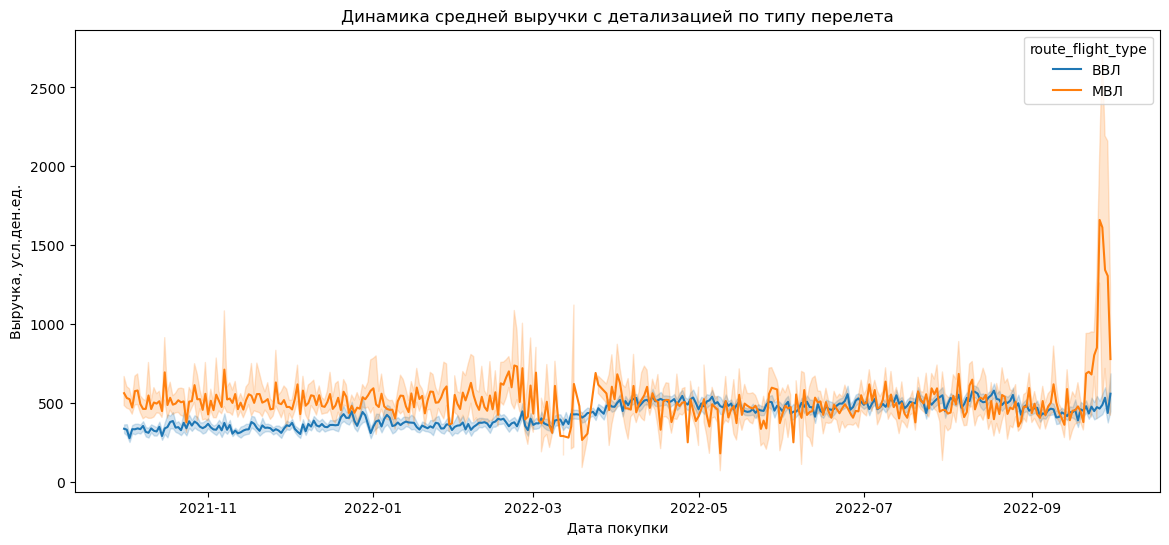

In [124]:
# построим график динамики выручки с детализацией по типу перелета
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='issue_date', y='revenue_amount', hue='route_flight_type').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, усл.ден.ед.', 
                                                                title='Динамика средней выручки с детализацией по типу перелета')
plt.show()

Видим, что до марта 2022 года средняя выручка по международным рейсам выше, чем по внутренним, далее она либо ниже, либо примерно равна выручке по внутренним, что может быть вызвано запретами стран на въезд граждан России. В конце сентября 2022 года видим резкий скачок, а затем падение выручки за международные рейсы. Колебания выручки по внутренним рейсам не такие сильные - вот, что значит стабильность.

In [126]:
# сгруппируем данные о выручке c датедетализацией по полю route_flight_type по месяцам
month_revenue_route = df.groupby([df['issue_date'].dt.month, 'route_flight_type'])['revenue_amount'].sum().reset_index()
month_revenue_route['issue_date'] = month_revenue_route['issue_date'].map(months)
month_revenue_route

,issue_date,route_flight_type,revenue_amount
0,4,ВВЛ,1152790
1,4,МВЛ,199600
2,5,ВВЛ,1173370
3,5,МВЛ,174400
4,6,ВВЛ,1789040
5,6,МВЛ,37390
6,7,ВВЛ,1926430
7,7,МВЛ,106140
8,8,ВВЛ,1635180
9,8,МВЛ,78180


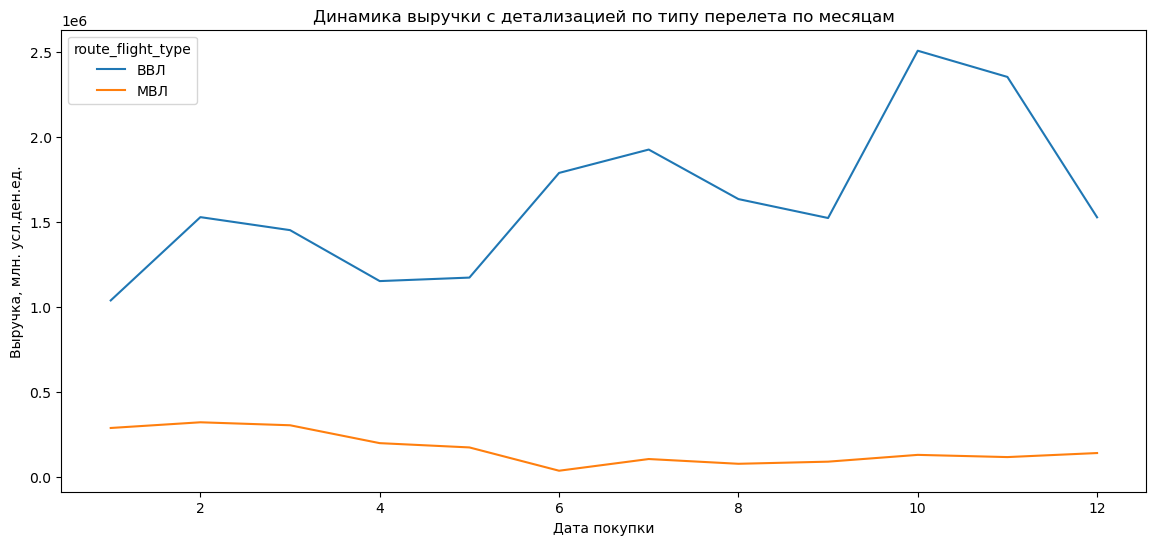

In [128]:
# построим график динамики выручки с детализацией по типу перелета по месяцам
plt.figure(figsize=(14, 6))
sns.lineplot(data=month_revenue_route, x='issue_date', y='revenue_amount', hue='route_flight_type').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, млн. усл.ден.ед.', 
                                                                title='Динамика выручки с детализацией по типу перелета по месяцам')
plt.show()

Видим, что выручка по МВЛ, колеблется в пределах от 0 до 0,5 млн. у.е., а по ВВЛ - от 1 до 2,5 млн. у.е. Получается, что выручка от ВВЛ намного намного больше, разница просто огромная.

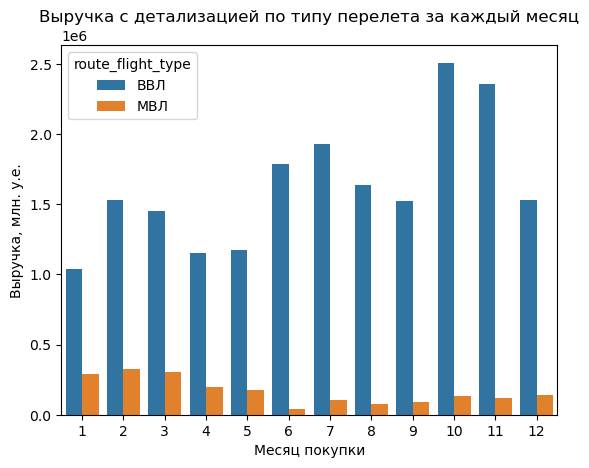

In [130]:
# построим столбчатую диаграмму объема выручки с детализацией по типу перелета по месяцям
sns.barplot(data=month_revenue_route, x='issue_date', y='revenue_amount', hue='route_flight_type').set(xlabel='Месяц покупки', 
                                                                ylabel='Выручка, млн. у.е.', 
                                                                title='Выручка с детализацией по типу перелета за каждый месяц')
plt.show()

Видим, что наибольшая выручка была получена за июль (для ввл) и ноябрь (для мвл), а наименьшая - за октябрь (для ввл) и за март (для мвл). Начиная с марта выручка по мвл стабильно держится почти на одном уровне.

In [132]:
# Cгруппируем данные о средней выручке c датедетализацией по полю sale_type
date_revenue_sale = df.groupby([df['issue_date'], 'sale_type'])['revenue_amount'].mean().reset_index()
date_revenue_sale

,issue_date,sale_type,revenue_amount
0,2021-10-01,OFFLINE,399.113924
1,2021-10-01,ONLINE,346.746988
2,2021-10-02,OFFLINE,394.634146
3,2021-10-02,ONLINE,325.384615
4,2021-10-03,OFFLINE,318.076923
...,...,...,...
725,2022-09-28,ONLINE,573.636364
726,2022-09-29,OFFLINE,609.032258
727,2022-09-29,ONLINE,357.500000
728,2022-09-30,OFFLINE,626.206897


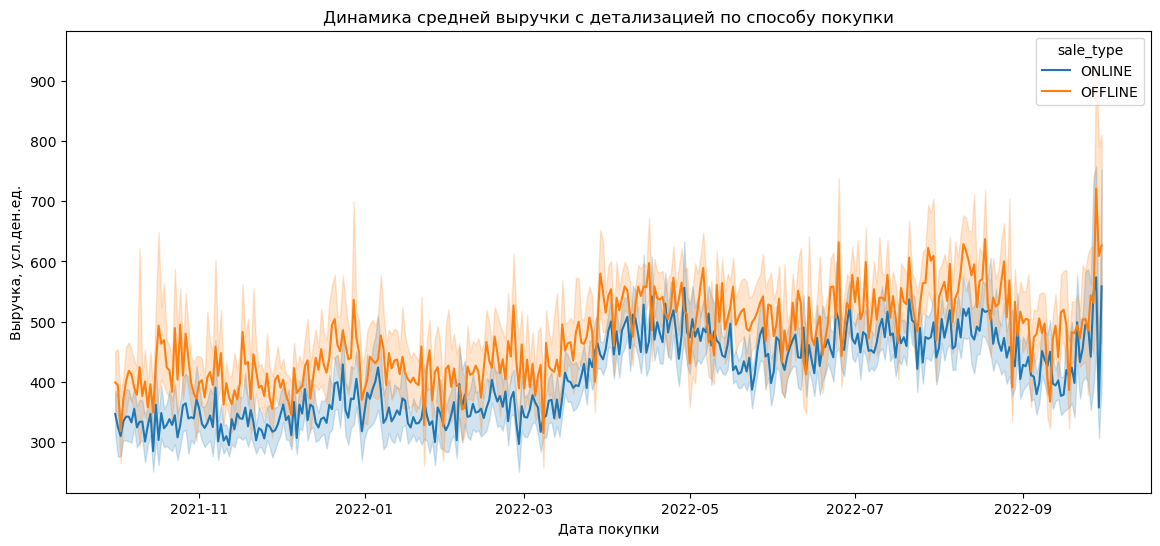

In [134]:
# построим график динамики выручки с детализацией по способу покупки
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='issue_date', y='revenue_amount', hue='sale_type').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, усл.ден.ед.', 
                                                                title='Динамика средней выручки с детализацией по способу покупки')
plt.show()

Видим, что средняя выручка по обеим группам колеблется 300 до 900 у.е. Выручка от оффлайн покупок билетов почти всегда выше, потому что когда мы покупаем билеты онлайн, то у нас есть возможность выбрать самый дешевый вариант, а при оффлайн покупке такой возможности нет, поэтому и выручка от них выше. В конце сентября наблюлаем резкий скачок вверх в выручке по покупкам оффлайн и резкий скачок вниз по покупкам онлайн.

In [136]:
# сгруппируем данные о выручке c датедетализацией по полю sale_type по месяцам
month_revenue_sale = df.groupby([df['issue_date'].dt.month, 'sale_type'])['revenue_amount'].sum().reset_index()
month_revenue_sale['issue_date'] = month_revenue_sale['issue_date'].map(months)
month_revenue_sale

,issue_date,sale_type,revenue_amount
0,4,OFFLINE,623900
1,4,ONLINE,728490
2,5,OFFLINE,670260
3,5,ONLINE,677510
4,6,OFFLINE,796020
5,6,ONLINE,1030410
6,7,OFFLINE,1035090
7,7,ONLINE,997480
8,8,OFFLINE,743570
9,8,ONLINE,969790


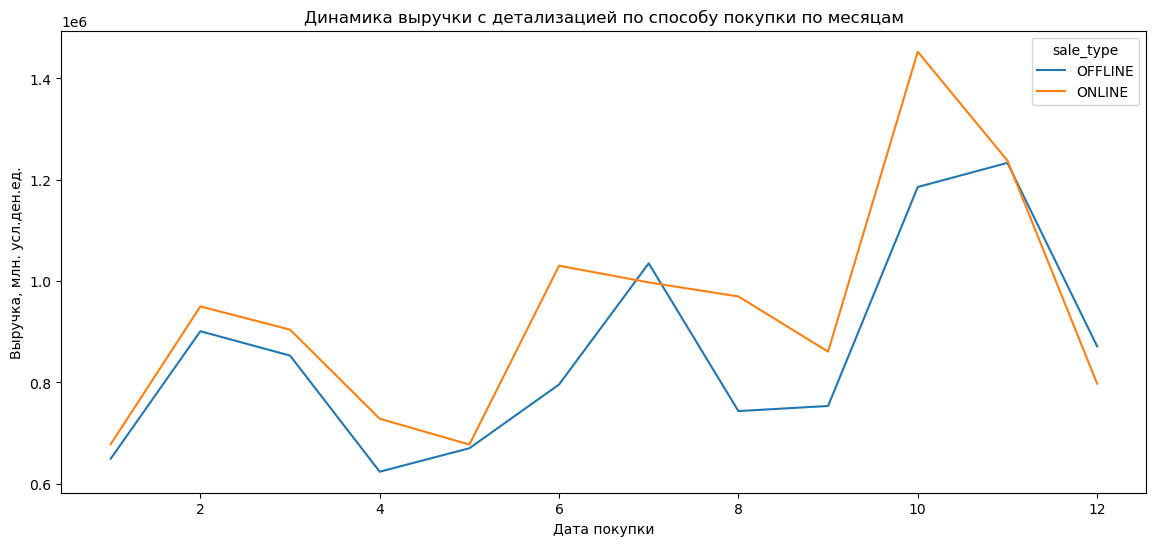

In [138]:
# построим график динамики выручки с детализацией по способу покупки по месяцам
plt.figure(figsize=(14, 6))
sns.lineplot(data=month_revenue_sale, x='issue_date', y='revenue_amount', hue='sale_type').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, млн. усл.ден.ед.', 
                                                                title='Динамика выручки с детализацией по способу покупки по месяцам')
plt.show()

Видим, что выручка по обеим группам колеблется в пределах от 0,6 до 1,5 млн. у.е. Несмотря на то, что средняя выручка почти всегда была больше от оффлайн покупок, здесь мы видим, что суммарная выручка все таки больше от онлайн покупок, потому что, видимо, чаще люди покупают онлайн, чем оффлайн.

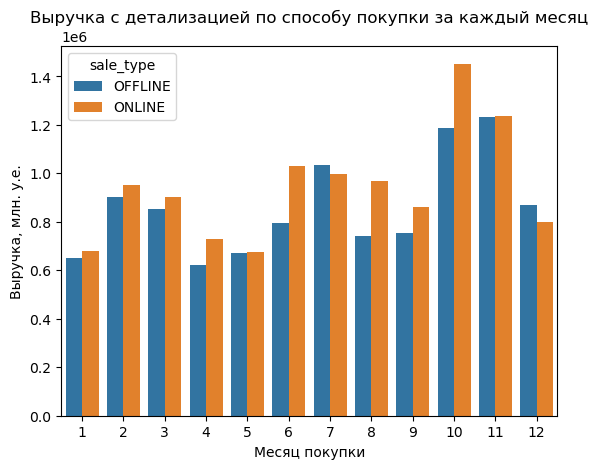

In [140]:
# построим столбчатую диаграмму объема выручки с детализацией по способу покупки по месяцям
sns.barplot(data=month_revenue_sale, x='issue_date', y='revenue_amount', hue='sale_type').set(xlabel='Месяц покупки', 
                                                                ylabel='Выручка, млн. у.е.', 
                                                                title='Выручка с детализацией по способу покупки за каждый месяц')
plt.show()

Видим, что наибольшая выручка вышла за июль (за онлайн покупки) и август (за оффлайн покупки), а наименьшая - за февраль (за онлайн покупки) и январь (за оффлайн покупки). В феврале и августе выручки от онлайн покупок почти равны выручкам от оффлайн покупок. В апреле и сентябре выручки от оффлайн  немного превышают выручки от онлайн покупок, но все же почти всегда лидирует выручка от онлайн покупок.

In [142]:
# Cгруппируем данные о средней выручке c датедетализацией по полю pax_type
date_revenue_pax = df.groupby([df['issue_date'], 'pax_type'])['revenue_amount'].mean().reset_index()
date_revenue_pax

,issue_date,pax_type,revenue_amount
0,2021-10-01,AD,377.891156
1,2021-10-01,CHD,317.333333
2,2021-10-02,AD,355.869565
3,2021-10-02,CHD,360.000000
4,2021-10-03,AD,317.524752
...,...,...,...
798,2022-09-28,AD,653.529412
799,2022-09-28,CHD,420.000000
800,2022-09-29,AD,480.784314
801,2022-09-29,CHD,735.000000


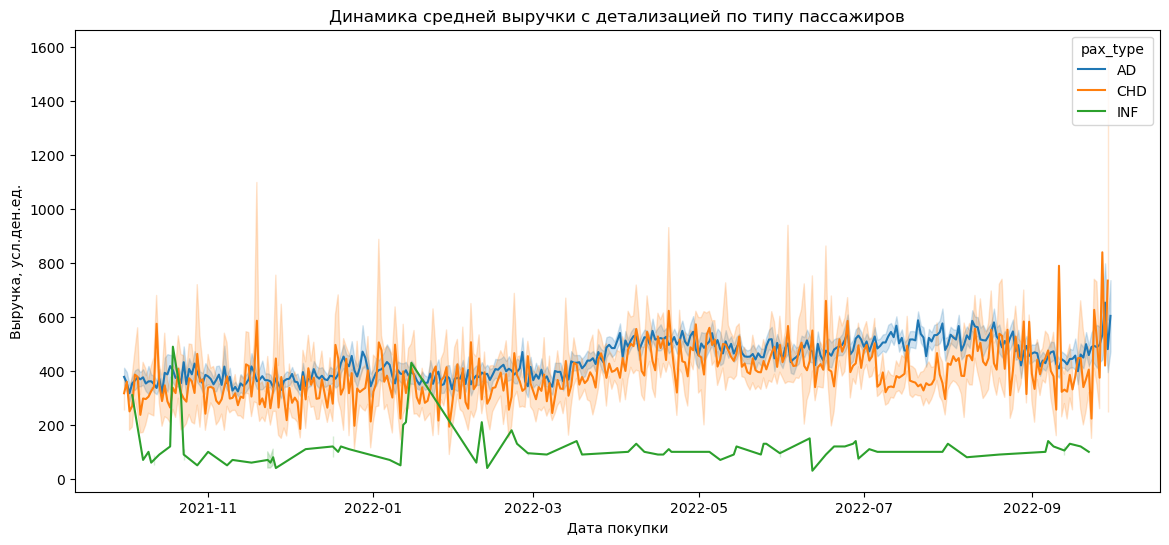

In [144]:
# построим график динамики выручки с детализацией по типу пассажиров
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='issue_date', y='revenue_amount', hue='pax_type').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, усл.ден.ед.', 
                                                                title='Динамика средней выручки с детализацией по типу пассажиров')
plt.show()

Видим, что средняя выручка по AD и CHD в пределах от 200 до 1000, а у INF близка к нулю. Также можно заметить, что чаще выручка больше от продажи взрослых билетов, нежели детских, вероятно, потому что взрослые летают больше. В конце сентября видим резкие скачки по выручке за продажу детских билетов, и меньше по резкости - скачки по продаже азромлых билетов.

In [146]:
# сгруппируем данные о выручке c датедетализацией по полю pax_type по месяцам
month_revenue_pax = df.groupby([df['issue_date'].dt.month, 'pax_type'])['revenue_amount'].sum().reset_index()
month_revenue_pax['issue_date'] = month_revenue_pax['issue_date'].map(months)
month_revenue_pax

,issue_date,pax_type,revenue_amount
0,4,AD,1282040
1,4,CHD,69390
2,4,INF,960
3,5,AD,1264640
4,5,CHD,82320
5,5,INF,810
6,6,AD,1721670
7,6,CHD,104440
8,6,INF,320
9,7,AD,1910770


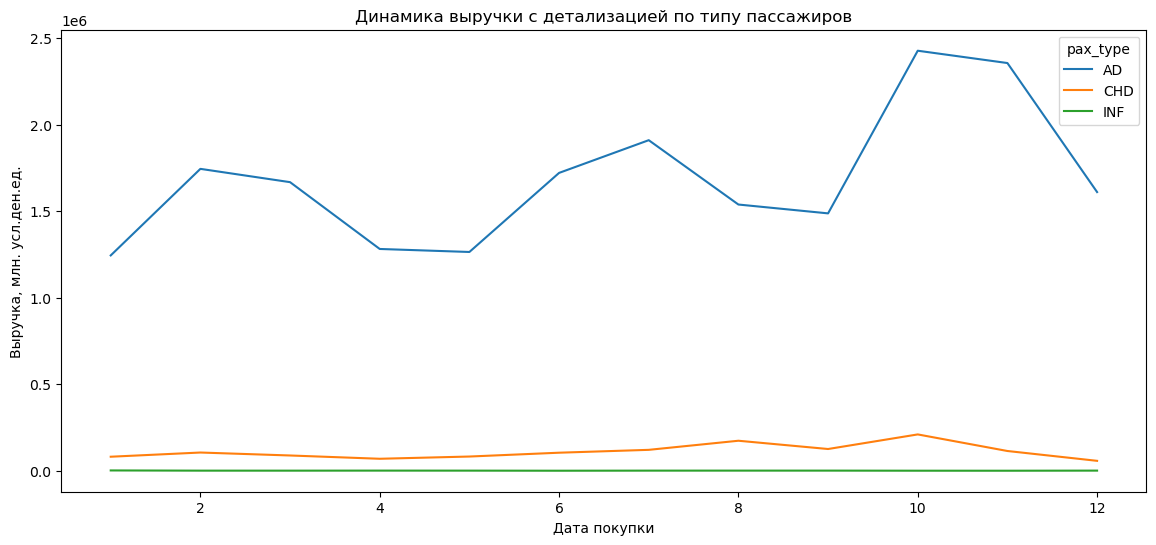

In [148]:
# построим график динамики выручки с детализацией по типу пассажиров по месяцам
plt.figure(figsize=(14, 6))
sns.lineplot(data=month_revenue_pax, x='issue_date', y='revenue_amount', hue='pax_type').set(xlabel='Дата покупки', 
                                                                ylabel='Выручка, млн. усл.ден.ед.', 
                                                                title='Динамика выручки с детализацией по типу пассажиров')
plt.show()

Видим, что суммарная выручка по взрослым билетам намного больше,чем по остальным группам. Она колеблется от 1 до 2,5 млн. у.е. Это можеть быть связано с тем, как я уже сказала, что взрослые летают намного больше, в командировки там всякие. Суммарная выручка по детским билетам находится в пределах о 0 до 0,5 млн. у.е., а по неопределенным - почти равна 0.

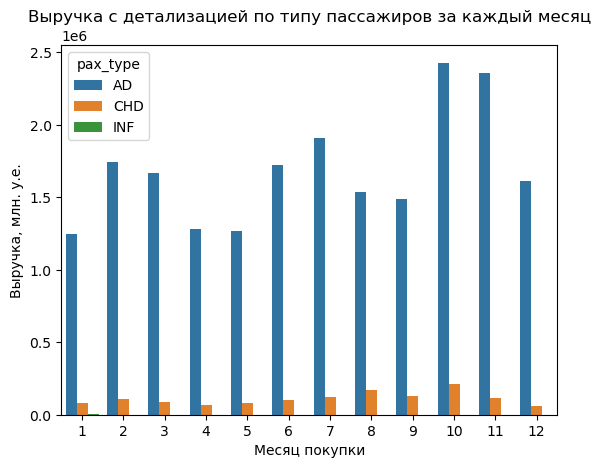

In [150]:
# построим столбчатую диаграмму объема выручки с детализацией по типу пассажиров по месяцям
sns.barplot(data=month_revenue_pax, x='issue_date', y='revenue_amount', hue='pax_type').set(xlabel='Месяц покупки', 
                                                                ylabel='Выручка, млн. у.е.', 
                                                                title='Выручка с детализацией по типу пассажиров за каждый месяц')
plt.show()

Видим, что наибольшая выручка за июль для AD и CHD и за октябрь для INF, а наименьшая - за октябрь (для AD) и сентябрь (для CHD), для INF она везде маленькая. Выручка от продажи детсикх билетов почти стабильная и находится примерно в одних пределах, а вот от продажи взрослых билетов - во-первых, намного выше, а во-вторых, более явно видны колебания.

### <a class="anchor" id="32st"></a> 3.2. Исследуем выручку, исследуем выбросы

#### Исследование выручки

In [152]:
# сгруппируем данные по выручке с детализацией по участию клиента в программе лояльности
revenue_ffp = df.groupby('ffp_flag')['revenue_amount'].sum().reset_index()
revenue_ffp

,ffp_flag,revenue_amount
0,0.0,13379980
1,1.0,8222390


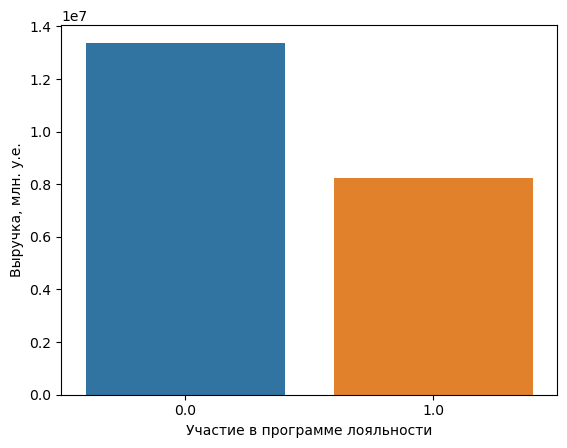

In [154]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_ffp, x='ffp_flag', y='revenue_amount').set(xlabel='Участие в программе лояльности', 
                                                               ylabel='Выручка, млн. у.е.')
plt.show()

Видим, что суммарная выручка по клиентам, не участвующим в программе лояльности, выше, что можно объснить тем, что, не участвуя в программе лояльности, они не получают некоторые скидки и не имеют доступа к более выгодным предложениям, поэтому платят больше.

In [156]:
# сгруппируем данные о выручке по типу перелета
revenue_route = df.groupby('route_flight_type')['revenue_amount'].sum().reset_index()
revenue_route

,route_flight_type,revenue_amount
0,ВВЛ,19610480
1,МВЛ,1991890


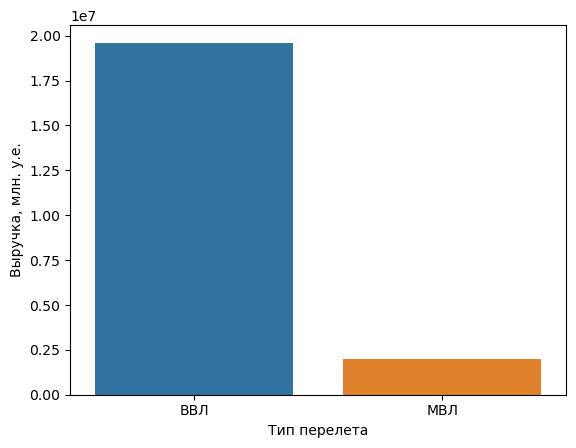

In [158]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_route, x='route_flight_type', y='revenue_amount').set(xlabel='Тип перелета', 
                                                                              ylabel='Выручка, млн. у.е.')
plt.show()

Видим, что выручка от билетов по внутренним рейсам намного больше, чем от билетов по международным. Это можно объяснить тем, что граждане перестали выезжать за границу и больше летать внутри страны. То есть стали летать не в Майами, а в Сочи (например).

In [160]:
# сгруппируем данные по способу покупки
revenue_sale = df.groupby('sale_type')['revenue_amount'].sum().reset_index()
revenue_sale 

,sale_type,revenue_amount
0,OFFLINE,10316900
1,ONLINE,11285470


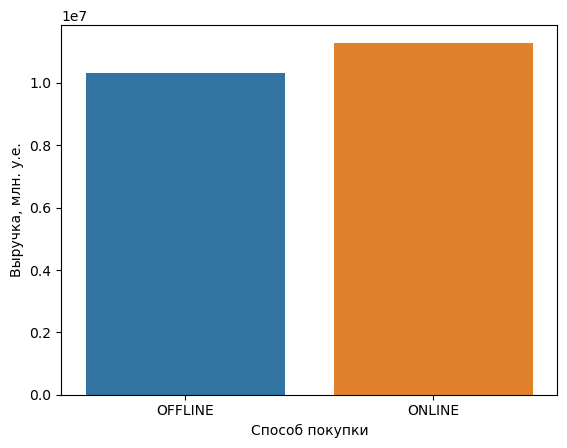

In [162]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_sale, x='sale_type', y='revenue_amount').set(xlabel='Способ покупки', 
                                                                    ylabel='Выручка, млн. у.е.')
plt.show()

Суммарная выручка по билетам, купленным онлайн, выше, хоть в среднем оффлайн-покупка приносит большую выручку. Это можно объяснить тем, как я уже тоже говорила ранее, что количество билетов, купленных онлайн, больше, и разрыв появляется из-за этого.

In [164]:
# сгруппируем данные по типам пассажиров
revenue_pax = df.groupby('pax_type')['revenue_amount'].sum().reset_index()
revenue_pax

,pax_type,revenue_amount
0,AD,20259210
1,CHD,1333430
2,INF,9730


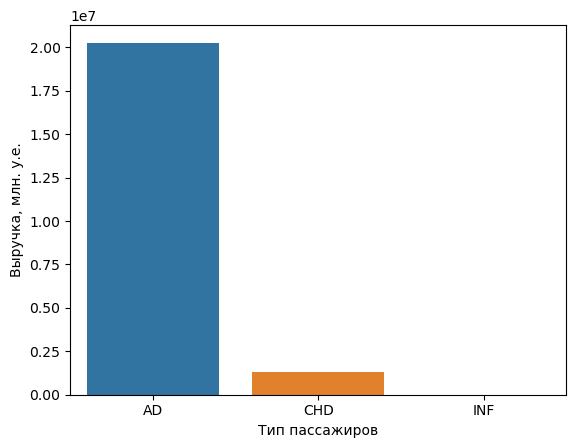

In [166]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_pax, x='pax_type', y='revenue_amount').set(xlabel='Тип пассажиров', 
                                                                ylabel='Выручка, млн. у.е.')
plt.show()

Видим, что выручка от взрослых билетов выше, чем выручка от детских. Это может быть связано с тем, что во-первых, для детей обычно есть льготы и кто-то может летать бесплатно. А во-вторых, как я уже говорила, взрослые летают чаще и больше детей: командировки, путешествия.

#### Исследование выбросов

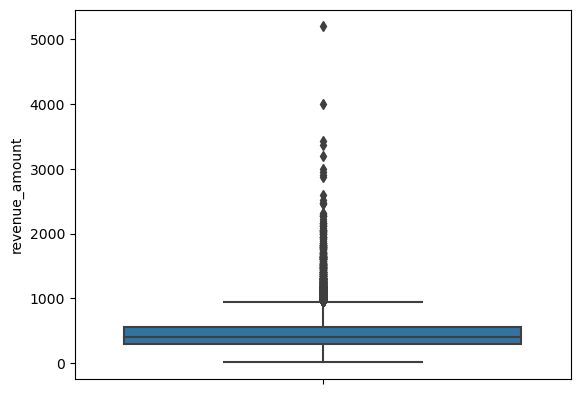

In [168]:
# проверим наличие выбросов
sns.boxplot(data=df, y='revenue_amount')
plt.show()

Выбросы есть и их много.

In [170]:
df['revenue_amount'].describe()

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

In [172]:
# удалим выбросы
q3 = df['revenue_amount'].describe()['75%']
q1 = df['revenue_amount'].describe()['25%']
iqr = q3-q1 
iqr_min = q1 - 1.5 * iqr
iqr_max = q3 + 1.5 * iqr
df1 = df[(iqr_min <= df['revenue_amount']) & (df['revenue_amount'] <= iqr_max)] 

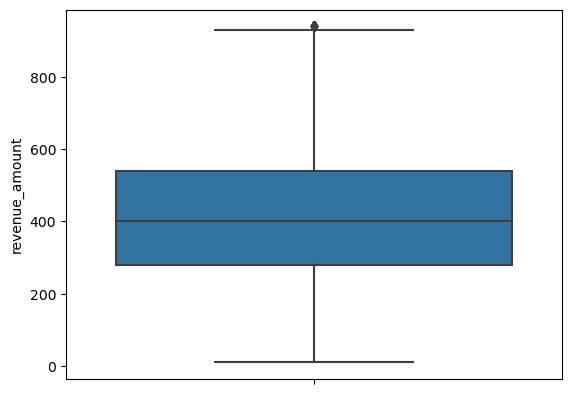

In [174]:
# снова проверяем
sns.boxplot(data=df1, y='revenue_amount')
plt.show()

Видим, что нас еще остались выбросы. Посмотрим их количество.

In [176]:
#Посмотрим количество оставшихся выбросов
df1[df1['revenue_amount'] == iqr_max].shape[0]

55

Не критично, конечно, и можно оставить, но еще можно попробовать исключить все выбросы немного по-другому.

##### Альтернативный способ исключения выбросов

In [178]:
#Так как у нас остались выбросы, попробуем исключить все выбросы немного по-другому
#Напишем функцию
def ejection (col):
    q75 = np.percentile(df[col], 75)
    q25 = np.percentile(df[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + 1.5 * iqr
    ejection_l = q25 - 1.5 * iqr
    ejection_count = len(df[(df[col] > ejection_h) | (df[col] < ejection_l)])
    ejection_perc = ejection_count / len(df) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [180]:
#Посмотрим количество выбросов
ejection_values = ejection('revenue_amount')
ejection_count = ejection_values[2]
ejection_count

987

In [182]:
# Выше мы нашли число выбросов, перевернем условия, чтобы отфильтровать датасет без них
df = df[(df['revenue_amount'] < ejection('revenue_amount')[0]) & (df['revenue_amount'] > ejection('revenue_amount')[1])]
df = df.reset_index(drop=True)
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0.0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0.0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1.0,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0.0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1.0,OFFLINE


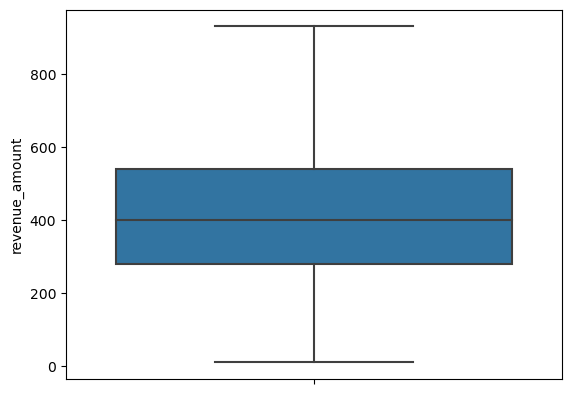

In [184]:
# проверяем выбросы
sns.boxplot(data=df, y='revenue_amount')
plt.show()

In [186]:
# Определяем количество выбросов после фильтрации
final_ejection_count = len(df[(df['revenue_amount'] > ejection_values[0]) | (df['revenue_amount'] < ejection_values[1])])
final_ejection_count

0

Ого! Оказывается, можно было удалить их все. Круто!

### <a class="anchor" id="33st"></a> 3.3. Исследуем сезонность продаж

In [188]:
# Cоздадим словарь месяцев по сезонам
season = {12: 'зима', 1: 'зима', 2: 'зима', 
          3: 'весна', 4: 'весна', 5: 'весна', 
          6: 'лето', 7: 'лето', 8: 'лето', 
          9:'осень', 10: 'осень', 11: 'осень'}

In [190]:
# добавим новый столбец в наш датасет
df['season'] = df['issue_date'].dt.month.map(season)
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0.0,ONLINE,зима
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0.0,OFFLINE,зима
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1.0,ONLINE,осень
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0.0,ONLINE,зима
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1.0,OFFLINE,зима


In [192]:
# сгруппируем выручку по сезонам
revenue_season = df.groupby('season')['revenue_amount'].sum().reset_index()
revenue_season

,season,revenue_amount
0,весна,5336440
1,зима,4263530
2,лето,6176460
3,осень,4583270


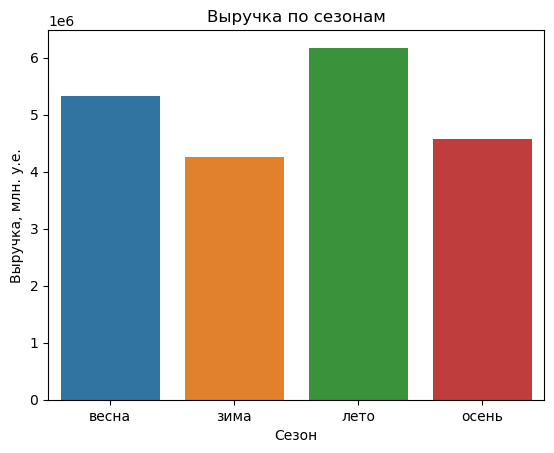

In [194]:
# построим столбчатую даграмму
sns.barplot(data=revenue_season, x='season', y='revenue_amount').set(xlabel='Сезон', 
                                                                ylabel='Выручка, млн. у.е.', 
                                                                title='Выручка по сезонам')
plt.show()

Видим, что самая больша суммарная выручка получилась летом, затем идет весна, осень, и зимой суммарная выручка меньше всего. По количеству больше билетов было куплено летом (потому что сезон отпусков, тепло, путешествия и все такое).

Проверим гипотезу о том, что выручка от продаж осенью и зимой отличается.

In [196]:
# для начала проверим на нормальность
# сформулируем гипотезу
print('H0: Выборка имеет нормальное распределение.')
print('H1: Выборка не имеет нормального распределения.')

H0: Выборка имеет нормальное распределение.
H1: Выборка не имеет нормального распределения.


In [198]:
winter = df[df['season'] == 'зима']['revenue_amount']
autumn = df[df['season'] == 'осень']['revenue_amount']

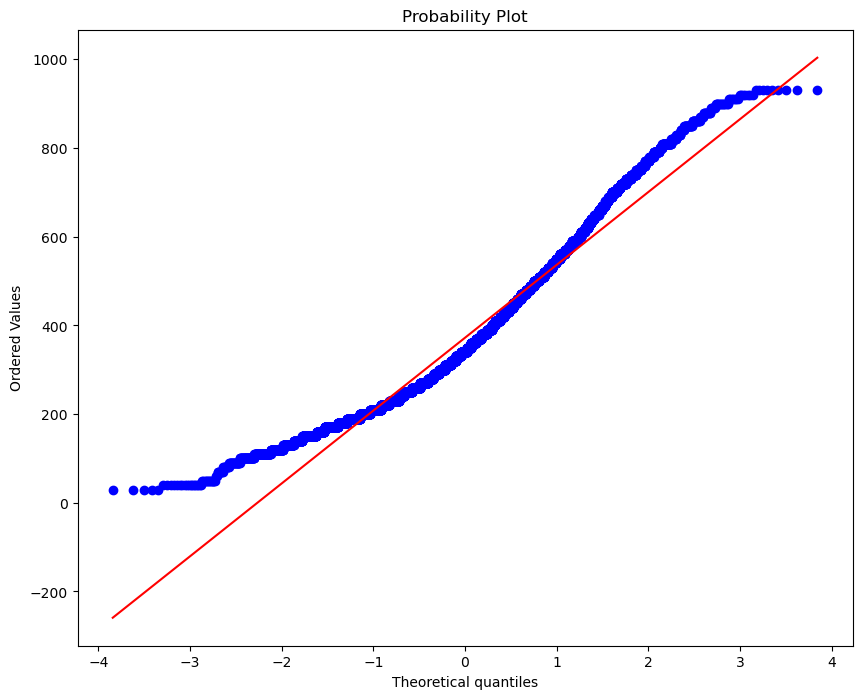

In [200]:
plt.figure(figsize=(10,8))
st.probplot(winter, dist='norm', plot=plt)
plt.show()

In [202]:
stat_w, p_w = st.shapiro(winter)
alpha = 0.05
if p_w < alpha:
    print('Отвергаем нулевую гипотезу. Выборка выручки за зиму не имеет нормального распределения.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка выручки за зиму имеет нормальное распределение.')

Отвергаем нулевую гипотезу. Выборка выручки за зиму не имеет нормального распределения.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


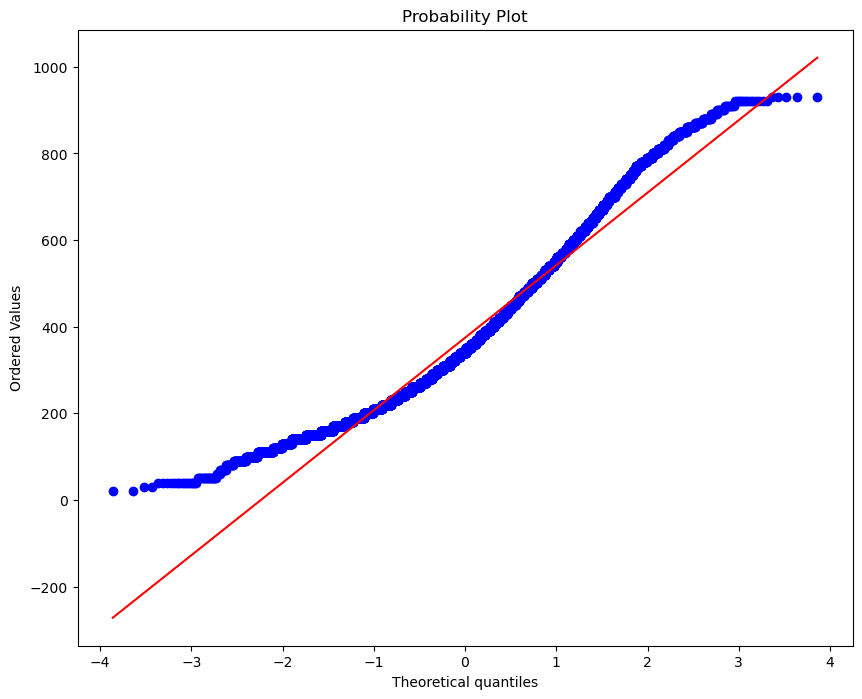

In [204]:
plt.figure(figsize=(10,8))
st.probplot(autumn, dist='norm', plot=plt)
plt.show()

In [206]:
stat_a, p_a = st.shapiro(autumn)
alpha = 0.05
if p_a < alpha:
    print('Отвергаем нулевую гипотезу. Выборка выручки за осень не имеет нормального распределения.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка выручки за осень имеет нормальное распределение.')

Отвергаем нулевую гипотезу. Выборка выручки за осень не имеет нормального распределения.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Выборки не имеют нормального распределения, поэтому для проверки гипотезы о равенстве выручки будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [208]:
# сформулируем гипотезу
print('H0: Выручка от продаж осенью и зимой не отличается.')
print('H1: Выручка от продаж осенью и зимой отличается.')

H0: Выручка от продаж осенью и зимой не отличается.
H1: Выручка от продаж осенью и зимой отличается.


In [210]:
alpha = 0.05
results = st.mannwhitneyu(winter, autumn)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: выручка от продаж осенью и зимой отличается.")
else:
    print("Не отвергаем нулевую гипотезу: выручка от продаж осенью и зимой не отличается.")

p-value: 0.4795045583858639
Не отвергаем нулевую гипотезу: выручка от продаж осенью и зимой не отличается.


Итак, тест показывает нам, что выручки осенью и зимой равны.

In [212]:
# найдем выручку по месяцам
df['month'] = df['issue_date'].dt.month
month_rev = df[['month', 'revenue_amount']]
month_rev['month'] = month_rev['month'].map(months)
month_rev.head()

/tmp/ipykernel_1689/408106882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_rev['month'] = month_rev['month'].map(months)


,month,revenue_amount
0,3,200
1,3,610
2,2,390
3,3,190
4,3,190


In [214]:
# построим матрицу корреляции
month_rev.corr() 

,month,revenue_amount
month,1.000000,0.260474
revenue_amount,0.260474,1.000000


Коэффициент корреляции равен примерно 0.26, по шкале Чеддока связь между месяцем и выручкой слабая и прямая.

In [216]:
# найдем сумму выручки по месяцам
month_rev_sum = df.groupby(df['issue_date'].dt.month)['revenue_amount'].sum().reset_index()
month_rev_sum['issue_date'] = month_rev_sum['issue_date'].map(months)
month_rev_sum

,issue_date,revenue_amount
0,4,1303150
1,5,1294370
2,6,1758080
3,7,1930440
4,8,1647920
5,9,1530140
6,10,2434800
7,11,2211520
8,12,1538280
9,1,1279930


In [218]:
# построим матрицу корреляции
month_rev_sum.corr() 

,issue_date,revenue_amount
issue_date,1.000000,0.512704
revenue_amount,0.512704,1.000000


Коэффициент корреляции равен примерно 0.52, по шкале Чеддока связь между месяцем и суммой выручки заметная и прямая.

In [220]:
# найдем число продаж по месяцам
month_rev_count = df.groupby(df['issue_date'].dt.month)['revenue_amount'].count().reset_index()
month_rev_count['issue_date'] = month_rev_count['issue_date'].map(months)
month_rev_count

,issue_date,revenue_amount
0,4,3551
1,5,3411
2,6,4273
3,7,3883
4,8,3559
5,9,3278
6,10,5079
7,11,4561
8,12,3550
9,1,3578


In [222]:
# построим матрицу корреляции
month_rev_count.corr() 

,issue_date,revenue_amount
issue_date,1.000000,-0.046634
revenue_amount,-0.046634,1.000000


Коэффициент корреляции равен примерно -0.05, по шкале Чеддока связь между месяцем и числом продаж слабая и обратная.

In [224]:
# найдем сумму число продаж по месяцам
month_reven = df.groupby(df['issue_date'].dt.month)['revenue_amount'].agg(['sum', 'count']).reset_index()
month_reven['issue_date'] = month_reven['issue_date'].map(months)
month_reven

,issue_date,sum,count
0,4,1303150,3551
1,5,1294370,3411
2,6,1758080,4273
3,7,1930440,3883
4,8,1647920,3559
5,9,1530140,3278
6,10,2434800,5079
7,11,2211520,4561
8,12,1538280,3550
9,1,1279930,3578


In [226]:
# построим матрицу корреляции
kf_corr = month_reven.corr()
kf_corr

,issue_date,sum,count
issue_date,1.000000,0.512704,-0.046634
sum,0.512704,1.000000,0.752742
count,-0.046634,0.752742,1.000000


<Axes: >

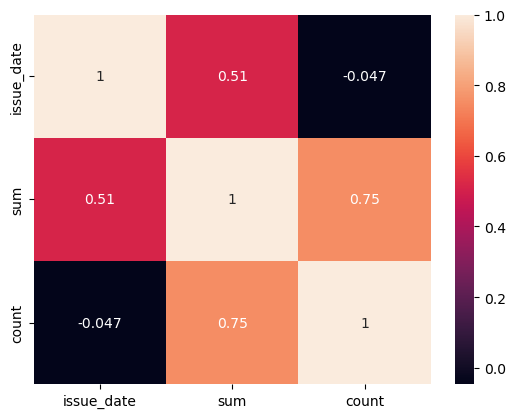

In [228]:
# в графическом виде
sns.heatmap(kf_corr, annot=True)

На графике представлена зависимость различных факторов; связи между месяцем и суммой и числом продаж мы уже рассмотрели; коэффициент корреляции суммы выручки от числа продаж равен примерно 0.75, связь между выручкой и числом продаж высокая и прямая.

### <a class="anchor" id="34st"></a> 3.4. Проверим гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается

In [230]:
# добавим столбец с данными о том, насколько заранее купили билет
df['time'] = df['flight_date_loc'] - df['issue_date']
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month,time
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0.0,ONLINE,зима,12,35 days
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0.0,OFFLINE,зима,12,3 days
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1.0,ONLINE,осень,11,37 days
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0.0,ONLINE,зима,12,28 days
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1.0,OFFLINE,зима,12,35 days


In [232]:
# минимальное количество дней от покупки до отлета
df['time'].min()

Timedelta('0 days 00:00:00')

In [234]:
# максимальное количество дней от покупки до отлета
df['time'].max()

Timedelta('317 days 00:00:00')

In [236]:
# поделим всех людей на группы по времени с момента покупки до перелета
# сначала найдем временной интервал для одной группы
delta = (df['time'].max() - df['time'].min()) / 3
delta

Timedelta('105 days 16:00:00')

In [238]:
# Напишем функцию, чтобы сгруппировать время по группам
def time_group(time):
    if df['time'].min() <= time < df['time'].min() + delta:
        return 'в последний момент'    
    elif df['time'].min() + delta <= time < df['time'].min() + 2 * delta:
        return 'заранее'    
    elif df['time'].min() + 2 * delta <= time <= df['time'].max():
        return 'сильно заранее'    

In [240]:
# Добавим новый столбец с группами
df['time_group'] = df['time'].apply(time_group)
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month,time,time_group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0.0,ONLINE,зима,12,35 days,в последний момент
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0.0,OFFLINE,зима,12,3 days,в последний момент
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1.0,ONLINE,осень,11,37 days,в последний момент
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0.0,ONLINE,зима,12,28 days,в последний момент
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1.0,OFFLINE,зима,12,35 days,в последний момент


In [244]:
# сгруппируем данные о выручке по типу перелета
revenue_time_group = df.groupby('time_group')['revenue_amount'].agg(['sum', 'count', 'mean']).reset_index()
revenue_time_group

,time_group,sum,count,mean
0,в последний момент,19709750,46909,420.169903
1,заранее,595660,1287,462.828283
2,сильно заранее,54290,124,437.822581


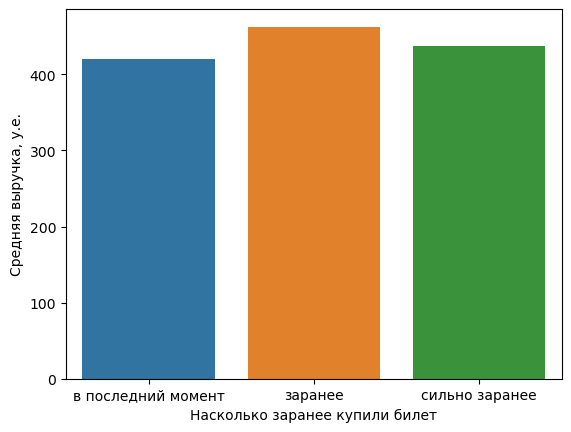

In [248]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_time_group, x='time_group', y='mean').set(xlabel='Насколько заранее купили билет', 
                                                                    ylabel='Средняя выручка, у.е.')
plt.show()

Средняя выручка от людей, которые покупают билеты за 105-210 дней (4-7 месяцев) до вылета больше всего, меньше всего средняя выручка от тех, кто покупает билеты менее чем за 105 дней до вылета, однако по количеству этих людей больше. Наибольшую суммарную выручку приносят клиенты, которые покупают билет менее чем за 105 дней до вылета.

In [250]:
# посмотрим, за сколько дней до вылета наиболшая и наименьшая средняя выручка
revenue_time_gr = df.groupby('time')['revenue_amount'].mean().reset_index().sort_values(by='revenue_amount', ascending=False)
revenue_time_gr

,time,revenue_amount
244,251 days,725.000000
204,204 days,663.333333
220,221 days,660.000000
251,258 days,635.000000
215,215 days,635.000000
...,...,...
247,254 days,250.000000
255,267 days,200.000000
236,239 days,190.000000
241,248 days,170.000000


Наибольшая средняя выручка была за 251 день до вылета, а наименьшая - за 317 дней до вылета. То есть, амая большая средняя цена билета была за 251 день до вылета, а самая маленькая - за 317 дней до вылета.

Проверим гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается.

In [252]:
# для начала проверим на нормальность
# сформулируем гипотезу
print('H0: Выборка имеет нормальное распределение.')
print('H1: Выборка не имеет нормального распределения.')

H0: Выборка имеет нормальное распределение.
H1: Выборка не имеет нормального распределения.


In [254]:
# Разделим на две группы
later = df[df['time_group'] == 'в последний момент']['revenue_amount']
earlier = df[(df['time_group'] == 'заранее') | (df['time_group'] == 'сильно заранее')]['revenue_amount']

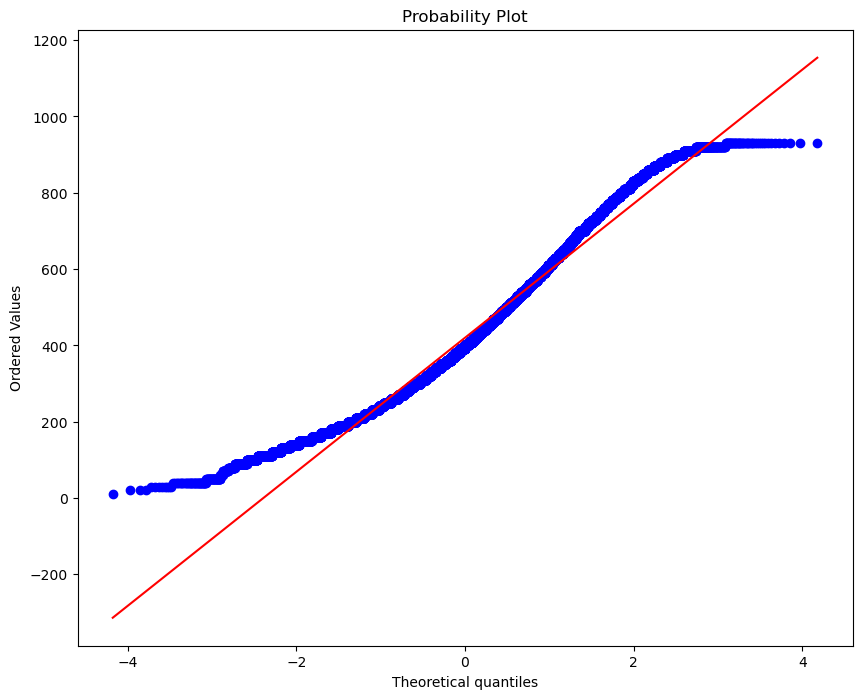

In [256]:
plt.figure(figsize=(10,8))
st.probplot(later, dist='norm', plot=plt)
plt.show()

In [258]:
stat_w, p_w = st.shapiro(later)
alpha = 0.05
if p_w < alpha:
    print('Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов в последний момент не имеет нормального распределения.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка выручки от покупок билетов в последний момент имеет нормальное распределение.')

Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов в последний момент не имеет нормального распределения.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


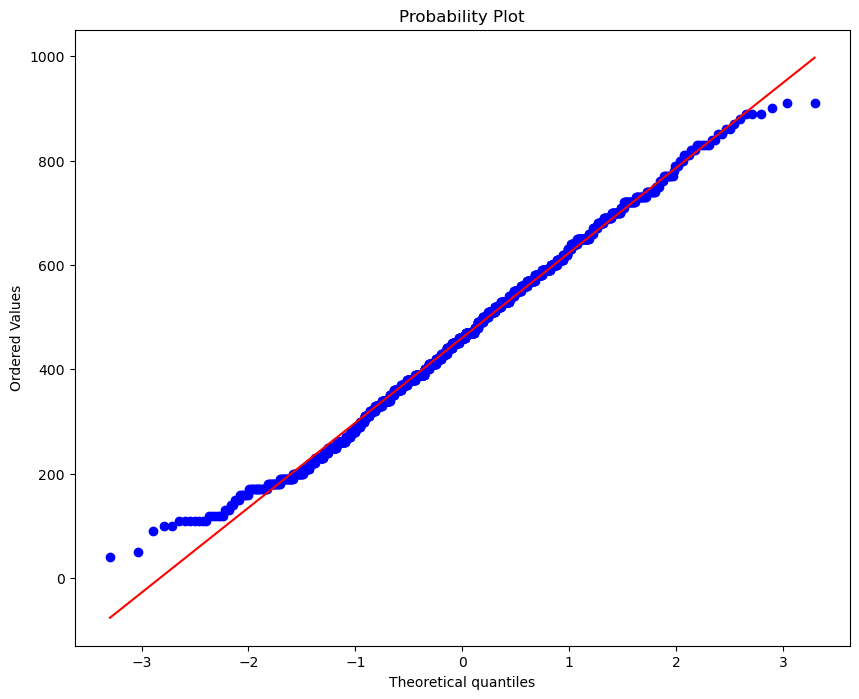

In [260]:
plt.figure(figsize=(10,8))
st.probplot(earlier, dist='norm', plot=plt)
plt.show()

In [262]:
stat_w, p_w = st.shapiro(earlier)
alpha = 0.05
if p_w < alpha:
    print('Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов заранее не имеет нормального распределения.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка выручки от покупок билетов заранее имеет нормальное распределение.')

Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов заранее не имеет нормального распределения.


Получили, что выборки не имеют нормального распределения. Применяем тест Манна-Уитни.

In [264]:
# сформулируем гипотезу
print('H0: Выручка от покупок билетов заранее и в последний момент не отличается.')
print('H1: Выручка от покупок билетов заранее и в последний момент отличается.')

H0: Выручка от покупок билетов заранее и в последний момент не отличается.
H1: Выручка от покупок билетов заранее и в последний момент отличается.


In [266]:
alpha = 0.05
results = st.mannwhitneyu(later, earlier)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: выручка от от покупок билетов заранее и в последний момент отличается.")
else:
    print("Не отвергаем нулевую гипотезу: выручка от от покупок билетов заранее и в последний момент не отличается.")

p-value: 2.100088814541333e-24
Отвергаем нулевую гипотезу: выручка от от покупок билетов заранее и в последний момент отличается.


Итак, делаем вывод, что выручка от от покупок билетов заранее и в последний момент отличается.

### <a class="anchor" id="35st"></a> 3.5. Определим топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ

In [268]:
# импортируем данные из датасета
data = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [270]:
# добавим столбцы с названиями город отправления и посадки
occ = set(df['orig_city_code'])    # коды аэропортов города вылета 
dcc = set(df['dest_city_code'])    # коды аэропортов города приземления
airport = set(data[4])    # коды аэропортов
airport1 = data[4]
city = data[2]    # множество городов во вспомогательной таблице
city_d = dict(zip(airport1, city))    # словарь "код аэропота - город"
cities_data = occ | dcc    # объединение всех кодов аэропортов, что встречаются в таблице с исследуемыми данными

In [272]:
df['from'] = df['orig_city_code'].map(city_d)    # город отправления по коду аэропорта
df['to']  = df['dest_city_code'].map(city_d)    # город прибытия по коду аэропорта

In [274]:
# Проверим пропуски
df[['from', 'to']].isna().sum()

from    15919
to      16027
dtype: int64

Есть пропуски.

In [276]:
# посмотрим, какие коды пропущены во вспомогательной таблице, но есть в исследуемой
missed = cities_data - airport
print(missed)

{'OHH', 'MIL', 'GRV', 'BER', 'TYO', 'BAK', 'MOW', 'LON', 'PAR', 'TOX', 'NQZ', 'ROM', 'SEL'}


In [278]:
# добавим в словарь недостающие значения
city_d['BER'] = 'Berlin'
city_d['GRV'] = 'Grozny'
city_d['MIL'] = 'Milan'
city_d['SEL'] = 'Seoul'
city_d['OHH'] = 'Okha'
city_d['MOW'] = 'Moskow'
city_d['LON'] = 'London'
city_d['TYO'] = 'Tokyo'
city_d['ROM'] = 'Rome'
city_d['BAK'] = 'Baku'
city_d['NQZ'] = 'Astana'
city_d['TOX'] = 'Tobolsk'
city_d['PAR'] = 'Paris'

In [280]:
# Вставим в датафрейм и проверим пропуски
df['from'] = df['orig_city_code'].map(city_d)
df['to']  = df['dest_city_code'].map(city_d) 
df[['from', 'to']].isna().sum()

from    0
to      0
dtype: int64

In [282]:
# Добавим новый столбец направления "из - в"
df['from_to'] = df['from'] + ' - ' + df['to']
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,season,month,time,time_group,from,to,from_to
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0.0,ONLINE,зима,12,35 days,в последний момент,Moskow,Kaliningrad,Moskow - Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0.0,OFFLINE,зима,12,3 days,в последний момент,Yuzhno-sakhalinsk,Novosibirsk,Yuzhno-sakhalinsk - Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1.0,ONLINE,осень,11,37 days,в последний момент,Kaliningrad,Moskow,Kaliningrad - Moskow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0.0,ONLINE,зима,12,28 days,в последний момент,Voronezh,Moskow,Voronezh - Moskow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1.0,OFFLINE,зима,12,35 days,в последний момент,Moskow,Krasnodar,Moskow - Krasnodar


In [284]:
# Фильтруем данные для внутренних рейсов
vvl = df[df['route_flight_type'] == 'ВВЛ']

In [286]:
# Группируем
vvl = vvl.groupby(vvl['from_to'])['revenue_amount'].agg(['sum', 'count']).reset_index()
vvl

,from_to,sum,count
0,Abakan - Krasnoyarsk,1080,6
1,Abakan - Moskow,73220,139
2,Abakan - Novosibirsk,43490,125
3,Anadyr - Irkutsk,3940,7
4,Anadyr - Vladivostok,8080,15
...,...,...,...
308,Yuzhno-sakhalinsk - Komsomolsk-on-Amur,550,2
309,Yuzhno-sakhalinsk - Krasnoyarsk,2570,6
310,Yuzhno-sakhalinsk - Novosibirsk,89020,135
311,Yuzhno-sakhalinsk - Petropavlovsk,950,3


In [288]:
# Находим топ-10
vvl_10 = vvl.sort_values(by='count', ascending=False)
vvl10 = vvl_10.head(10)
vvl10

,from_to,sum,count
256,Sochi - Moskow,513970,1326
138,Moskow - Sochi,480480,1292
260,St. Petersburg - Moskow,280870,1211
139,Moskow - St. Petersburg,273720,1190
192,Novosibirsk - Moskow,460720,967
125,Moskow - Novosibirsk,439500,943
52,Kazan - Moskow,205230,759
107,Moskow - Kazan,204660,757
143,Moskow - Ufa,210610,708
209,Novosibirsk - Sochi,381530,667


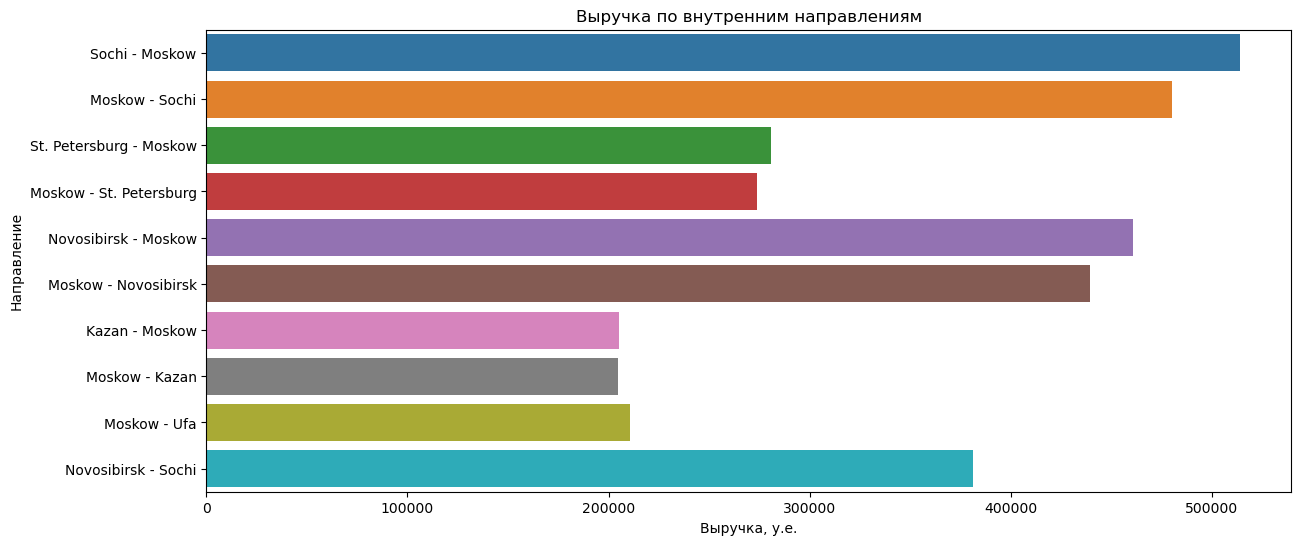

In [290]:
# Строим диаграмму
plt.figure(figsize=(14, 6))
sns.barplot(data=vvl10, y='from_to', x='sum', orient='h').set(xlabel='Выручка, у.е.', 
                                                              ylabel='Направление',
                                                             title='Выручка по внутренним направлениям')
plt.show()

Самым популярным направлением внутри страны является Сочи-Москва. Второй по популярности - перелет обратно (Москва-Сочи). Также эти два направления приносят наибольшую выручку, после по выручке идут направления Новосибирск-Москва и обратно. Направление Новосибирск-Сочи является последним в этой десятке по количеству покупаемых билетов, но по выручке оно не последнее, а даже одно из высоких. Наименьшую выручку принесли направления Казань-Москва и обратно, а также направление Москва-Уфа.


In [292]:
# Фильтруем данные для международных рейсов
mvl = df[df['route_flight_type'] == 'МВЛ']

In [294]:
# Группируем
mvl = mvl.groupby(mvl['from_to'])['revenue_amount'].agg(['sum', 'count']).reset_index()
mvl

,from_to,sum,count
0,Alicante - Moskow,7270,16
1,Alma-ata - Moskow,3610,7
2,Antalya - Moskow,36480,80
3,Antalya - Novosibirsk,720,1
4,Astana - Moskow,1780,3
...,...,...,...
316,Yerevan - Samara,800,2
317,Yerevan - Saratov,4820,10
318,Yerevan - Sochi,2070,6
319,Yerevan - Volgograd,2530,7


In [296]:
# Находим топ-10
mvl_10 = mvl.sort_values(by='count', ascending=False)
mvl10 = mvl_10.head(10)
mvl10

,from_to,sum,count
167,Moskow - Osh,67190,150
100,Khudzhand - Moskow,95190,144
224,Osh - Moskow,80920,136
158,Moskow - Khudzhand,57710,129
199,Novosibirsk - Bishkek,46980,120
210,Novosibirsk - Osh,47450,119
102,Khudzhand - Novosibirsk,57740,116
226,Osh - Novosibirsk,56980,115
29,Bishkek - Novosibirsk,48300,102
138,Moskow - Antalya,38080,101


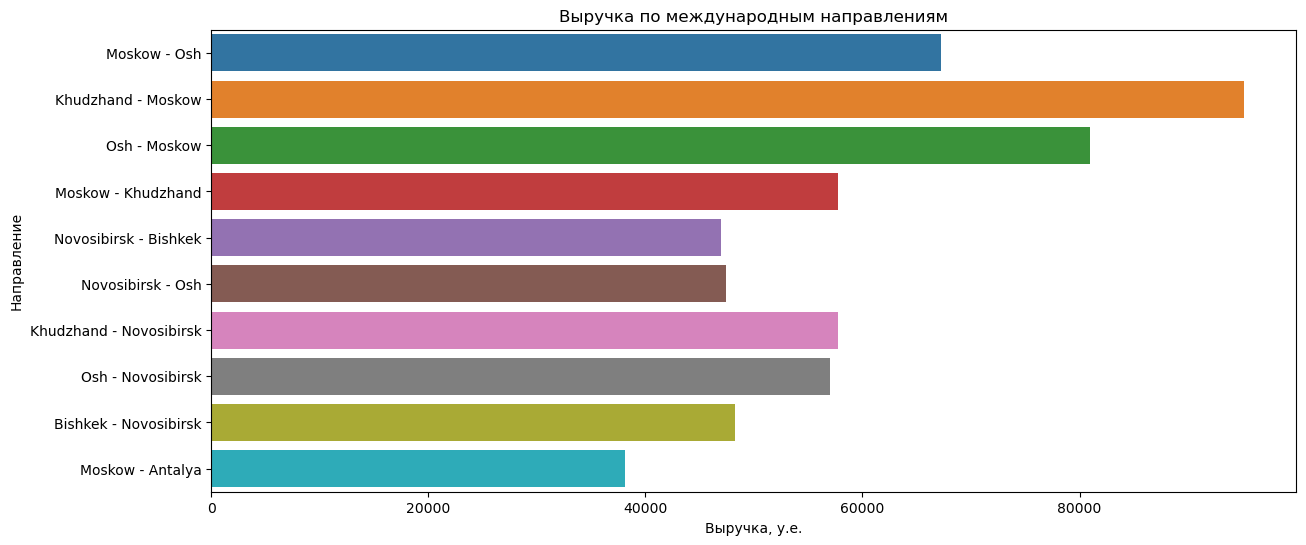

In [298]:
# Строим диаграмму
plt.figure(figsize=(14, 6))
sns.barplot(data=mvl10, y='from_to', x='sum', orient='h').set(xlabel='Выручка, у.е.', 
                                                              ylabel='Направление',
                                                             title='Выручка по международным направлениям')
plt.show()

Видим, что самым популярным международным направлением является Москва-Ош, на втором месте направление Худжанд-Москва и оно же приносит наибольшую выручку. А вот обратное направление - Москва-Худжанд приносит не такую большую выручку. Направление Москва-Анталья является самым непопулярным из 10 и имеет самую низкую выручку.


Проверим гипотезу о том, что выручка от международных рейсов отличается от выручки от внутренних.

In [300]:
# для начала проверим на нормальность
# сформулируем гипотезу
print('H0: Выборка имеет нормальное распределение.')
print('H1: Выборка не имеет нормального распределения.')

H0: Выборка имеет нормальное распределение.
H1: Выборка не имеет нормального распределения.


In [302]:
vr = df[df['route_flight_type'] == 'ВВЛ']['revenue_amount']
mr = df[df['route_flight_type'] == 'МВЛ']['revenue_amount']

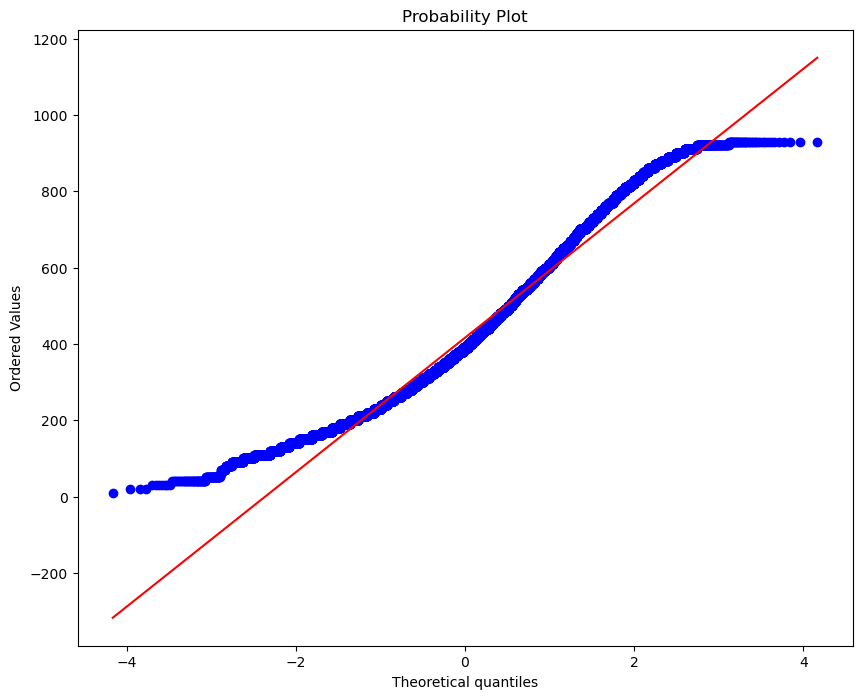

In [304]:
plt.figure(figsize=(10,8))
st.probplot(vr, dist='norm', plot=plt)
plt.show()

In [306]:
stat_v, p_v = st.shapiro(vr)
alpha = 0.05
if p_v < alpha:
    print('Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов на внутренние направления не имеет нормального распределения.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка выручки от покупок билетов на внутренние направления имеет нормальное распределение.')

Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов на внутренние направления не имеет нормального распределения.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


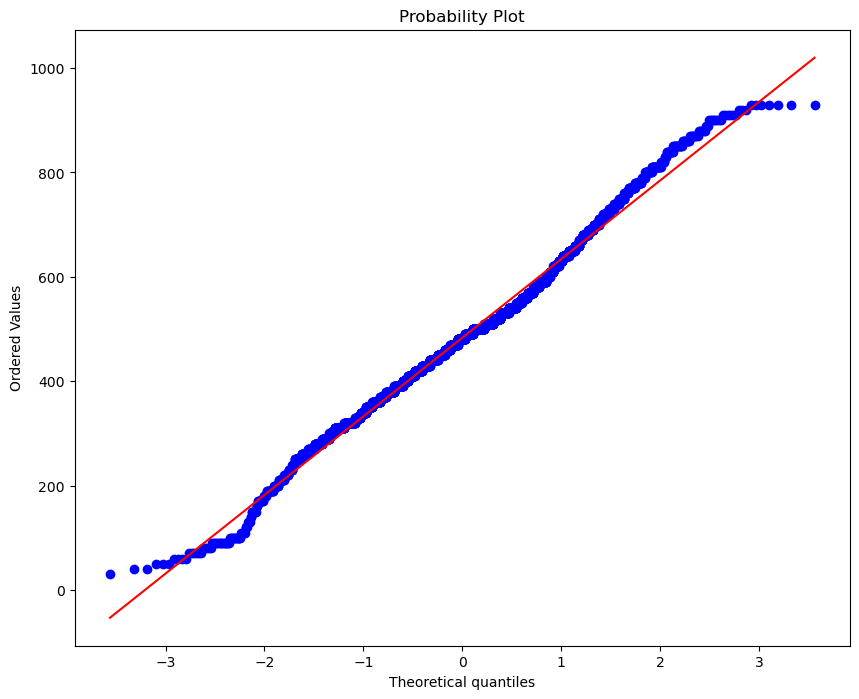

In [308]:
plt.figure(figsize=(10,8))
st.probplot(mr, dist='norm', plot=plt)
plt.show()

In [310]:
stat_m, p_m = st.shapiro(mr)
alpha = 0.05
if p_m < alpha:
    print('Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов на международные направления не имеет нормального распределения.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка выручки от покупок билетов на международные направления имеет нормальное распределение.')

Отвергаем нулевую гипотезу. Выборка выручки от покупок билетов на международные направления не имеет нормального распределения.


Получаем, что обе выборки не имеют нормального распределения. Используем тест Манна-Уитни.

In [312]:
# сформулируем гипотезу
print('H0: Выручка от покупок билетов на внутренние и международные направления не отличается.')
print('H1: Выручка от покупок билетов на внутренние и международные направления отличается.')

H0: Выручка от покупок билетов на внутренние и международные направления не отличается.
H1: Выручка от покупок билетов на внутренние и международные направления отличается.


In [314]:
alpha = 0.05
results = st.mannwhitneyu(vr, mr)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: выручка от покупок билетов на внутренние и международные направления отличается.")
else:
    print("Не отвергаем нулевую гипотезу: выручка от покупок билетов на внутренние и международные направления не отличается.")

p-value: 8.574209012955523e-156
Отвергаем нулевую гипотезу: выручка от покупок билетов на внутренние и международные направления отличается.


Итак, можно сделать вывод, что выручка от покупок билетов на внутренние и международные направления все таки отличается.

### <a class="anchor" id="36st"></a> 3.6. Определим есть ли зависимость выручки от других признаков. Построим матрицу корреляций.

In [316]:
# сгруппируем данные по выручке с детализацией по участию клиента в программе лояльности
revenue_ffp1 = df.groupby('ffp_flag')['revenue_amount'].agg(['sum', 'count', 'mean']).reset_index()
revenue_ffp1

,ffp_flag,sum,count,mean
0,0.0,12594740,29374,428.771703
1,1.0,7764960,18946,409.846933


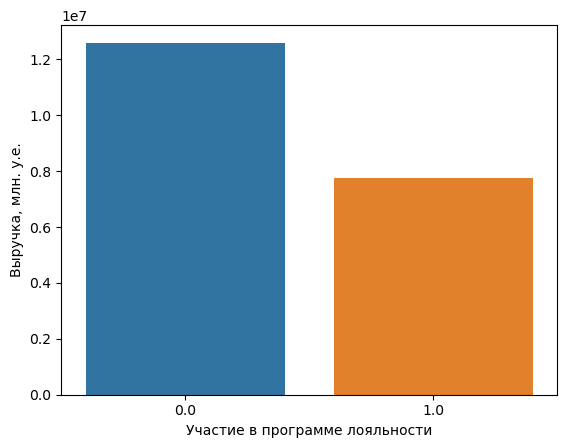

In [318]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_ffp1, x='ffp_flag', y='sum').set(xlabel='Участие в программе лояльности', 
                                                               ylabel='Выручка, млн. у.е.')
plt.show()

Суммарная выручка от клиентов, участвующих в программе лояльности, меньше, чем от неучаствующих, что объясняется, как мы говорили, скидками, уменьшающими сумму покупки. А также тех, кто участвует в программе лояльности, на треть меньше тех, кто неучаствует, что тоже влияет на суммы выручки.

In [320]:
# сгруппируем данные по способу покупки
revenue_sale1 = df.groupby('sale_type')['revenue_amount'].agg(['sum', 'count', 'mean']).reset_index()
revenue_sale1 

,sale_type,sum,count,mean
0,OFFLINE,9548320,20980,455.115348
1,ONLINE,10811380,27340,395.441843


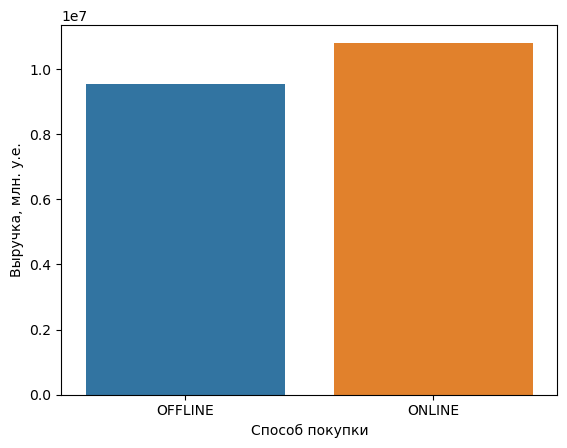

In [322]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_sale1, x='sale_type', y='sum').set(xlabel='Способ покупки', 
                                                                    ylabel='Выручка, млн. у.е.')
plt.show()

Суммарная выручка от билетов, купленных онлайн, больше, чем от билетов, купленных оффлайн.

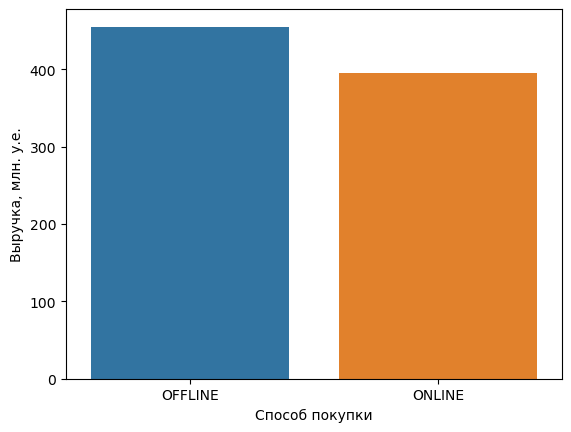

In [324]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_sale1, x='sale_type', y='mean').set(xlabel='Способ покупки', 
                                                                    ylabel='Выручка, млн. у.е.')
plt.show()

Однако средняя выручка будет больше от билетов, купленных офлайн. Суммарная выручка больше от билетов, купленных онлайн, так как больше само количество купленных онлайн билетов. То есть люди больше покупают онлайн, чем оффлайн.

In [326]:
# сгруппируем данные по типам пассажиров
revenue_pax1 = df.groupby('pax_type')['revenue_amount'].agg(['sum', 'count', 'mean']).reset_index()
revenue_pax1

,pax_type,sum,count,mean
0,AD,19046410,44813,425.019749
1,CHD,1303560,3421,381.046478
2,INF,9730,86,113.139535


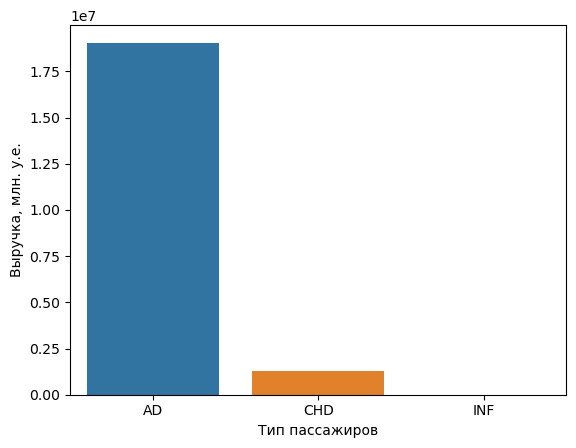

In [328]:
# построим столбчатую диаграмму
sns.barplot(data=revenue_pax1, x='pax_type', y='sum').set(xlabel='Тип пассажиров', 
                                                                ylabel='Выручка, млн. у.е.')
plt.show()

Выручка от продажи взрослых билетов намного больше, чем от продажи детских, поскольку, как мы уже говорили, взрослые больше путешествуют, ездят в командировки, а у детей еще имеются и льготы, именьшающие стоимость билета. Поэтому доход больше от продажи взрослых билетов.

In [330]:
# проверим корреляцию средней выручки
corr_d = df[['revenue_amount', 'month', 'ffp_flag', 'time']].copy()
corr_d['month'] = corr_d['month'].map(months)

In [332]:
# построим матрицу корреляции
kf_corr1 = corr_d.corr()
kf_corr1

,revenue_amount,month,ffp_flag,time
revenue_amount,1.000000,0.260474,-0.051968,0.058968
month,0.260474,1.000000,-0.042975,-0.075528
ffp_flag,-0.051968,-0.042975,1.000000,0.022505
time,0.058968,-0.075528,0.022505,1.000000


<Axes: >

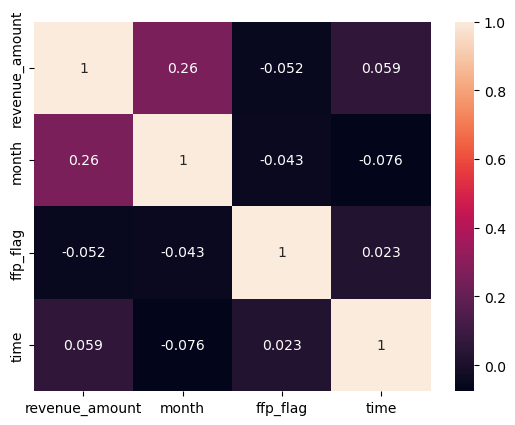

In [334]:
# и графически
sns.heatmap(kf_corr1, annot=True)

На графике представлены зависимости различных факторов друг от друга, связь между ними слабая; коэффициент корреляции средней выручки от месяца покупки равен 0.26 и связь помимо слабой еще и прямая, коэффициент корреляции средней выручки от участия в программе лояльности покупки равен -0.052 и связь помимо слабой еще и обратная, коэффициент корреляции средней выручки от промежутка между покупкой и перелетом равен 0.06 и связь помимо слабой еще и прямая.

In [336]:
# Проверим корреляцию суммарной выручки
corr_sum_d = corr_d.groupby('month').agg(
    sum_revenue=('revenue_amount', 'sum'),
    time=('time', 'mean'),
    ffp=('ffp_flag', 'mean'),
    count=('revenue_amount', 'count')
).reset_index()
corr_sum_d = corr_sum_d[['sum_revenue', 'ffp', 'month', 'time', 'count']]

In [338]:
# Вычисляем корреляцию и сторим матрицу
kf_corr2 = corr_sum_d.corr()
kf_corr2

,sum_revenue,ffp,month,time,count
sum_revenue,1.000000,-0.222102,0.512704,-0.299299,0.752742
ffp,-0.222102,1.000000,-0.724480,0.323757,0.243640
month,0.512704,-0.724480,1.000000,-0.360378,-0.046634
time,-0.299299,0.323757,-0.360378,1.000000,-0.344662
count,0.752742,0.243640,-0.046634,-0.344662,1.000000


<Axes: >

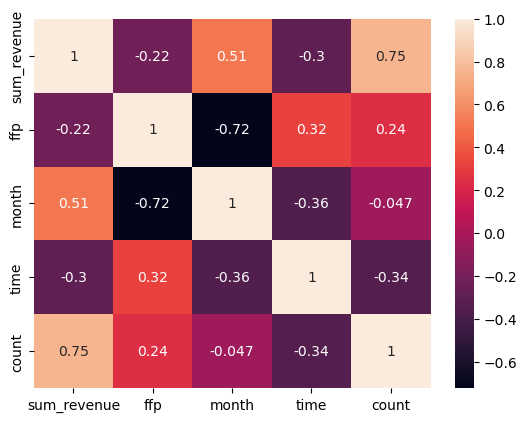

In [340]:
# и графически
sns.heatmap(kf_corr2, annot=True)

Итак, коэффициент корреляции суммарной выручки от количества продаж равен 0.75, связь сильная и прямая; коэффициент корреляции суммарной выручки от месяца покупки равен 0.51, связь заметная и прямвя; коэффициент корреляции суммарной выручки от участия в программе лояльности покупки равен -0.22, связь слабая и обратная; коэффициент корреляции суммарной выручки от промежутка между покупкой и перелетом равен -0.3, связь слабая и обратная.

# <a class="anchor" id="4st"></a> Выводы

Итак, в ходе работы мы сделали следующее:
1. Познакомились с данными:
* 1. Обнаружили, что заголовки в неудобном виде (в верхнем регистре)   
* 2. Обнаружили пропуски в данных ( в столбцах с индексами  4, 5, 7)
* 3. Обнаружили несоответствие типов данных с данными в некоторых столбцах ( в столбцах с индексами 0, 1)
2. Сделали предобработку данных:
* 1. Мы привели заголовки к удобному виду (в нижний регистр).
* 2. Изменили типы данных со временем.
* 3. Обработали пропуски, и в дальнейшем их не было.
* 4. Удалили дубликаты, и в дальнейшем их тоже не было.
* 5. Исключили нулевые значения в выручке для дальнейшего исследовния.
3. Провели исследовательский анализ данных: по полученным данным изучили связи между различными факторами и выручкой от продажи авиабилетов и сделали следующие выводы:
   * Наибольшая выручка была зафиксирована в июле, в то время как октябрь, январь и февраль показали наименьшие значения. После резкого подъема в июле выручка также резко снизилась в сентябре. Важно отметить, что наибольшую выручку мы получили в июле, за ним следует август, а октябрь стал самым слабым месяцем по выручке, наряду с январем и февралем, которые лишь незначительно превысили октябрьские показатели.
   * Средние выручки по группам клиентов (участвующим и не участвующим в программе лояльности) колеблются. В конце сентября наблюдаются резкие изменения: выручка от участников программы лояльности падает, в то время как у неучаствующих клиентов она немного возрастает. Выручка от группы клиентов, не участвующих в программе лояльности, превышает показатели участников программы. Наибольшая выручка по обеим группам пришлась на июль, тогда как наименьшая была зафиксирована в феврале для участников программы и в январе для неучаствующих. Низкие показатели выручки также наблюдаются в октябре, январе и августе для клиентов, участвующих в программе лояльности.
   * До марта 2022 года средняя выручка по международным рейсам была выше, чем по внутренним, однако после этого периода они либо стали ниже, либо сравнялись, что может быть связано с запретами на въезд граждан России. В конце сентября 2022 года наблюдается резкий скачок, за которым следует падение выручки по международным рейсам. В отличие от них, колебания выручки по внутренним рейсам менее выражены, что свидетельствует о стабильности. Наибольшая выручка была получена за июль (для ВВЛ) и ноябрь (для МВЛ), а наименьшая — за октябрь (для ВВЛ) и март (для МВЛ). С марта выручка по МВЛ стабильно держится на одном уровне.
   * Выручка от оффлайн-покупок билетов почти всегда выше, поскольку при онлайн-покупке клиенты могут выбирать более дешевые варианты. В конце сентября наблюдается резкий скачок вверх в выручке от оффлайн-покупок и резкое падение по онлайн-покупкам. Несмотря на то что средняя выручка от оффлайн-покупок чаще выше, суммарная выручка от онлайн-покупок оказывается больше, вероятно из-за более высокой частоты онлайн-покупок. Наибольшая выручка зафиксирована в июле для онлайн-покупок и в августе для оффлайн-покупок, а наименьшая — в феврале для онлайн и в январе для оффлайн-покупок. В феврале и августе выручки от онлайн и оффлайн покупок почти равны. В апреле и сентябре выручки от оффлайн-покупок немного превышают онлайн, но в целом онлайн-покупки остаются лидирующими.
   * Чаще всего выручка выше от продажи взрослых билетов. В конце сентября наблюдаются резкие скачки по выручке от продажи детских билетов и менее выраженные изменения по взрослым билетам. Наибольшая выручка наблюдается в июле для взрослых и детей, в то время как наименьшая выручка зафиксирована в октябре для взрослых и сентябре для детей. Выручка от детских билетов стабильна, тогда как выручка от взрослых билетов колеблется и значительно выше, что может быть связано с наличием льгот для детей и тем, что взрослые летают чаще.
   * Клиенты, не участвующие в программе лояльности, приносят больше выручки, так как не получают скидок и более выгодных предложений. Выручка от внутренних рейсов также значительно превышает международные, что объясняется уменьшением выездов за границу и увеличением внутреннего туризма. Несмотря на то, что средняя выручка от оффлайн-покупок выше, суммарная выручка от онлайн-продаж больше из-за большего количества проданных билетов.
   * Анализ сезонности показал, что летом наблюдается наибольшая суммарная выручка, затем идет весна, осень, а зимой выручка минимальна. Количество проданных билетов также максимальное летом из-за сезона отпусков. Связь между месяцем и выручкой слабая прямая, между месяцем и суммой выручки — заметная прямая связь, а между месяцем и числом продаж — слабая обратная связь. Высокая прямая связь наблюдается между выручкой и числом продаж.
   * Клиенты, покупающие билеты за 105-210 дней до вылета, приносят наибольшую среднюю выручку, в то время как те, кто покупает менее чем за 105 дней, имеют меньшую среднюю выручку, хотя их количество больше. Наибольшая средняя выручка фиксируется за 251 день до вылета, а наименьшая — за 317 дней до вылета. Это свидетельствует о различиях в выручке от ранних и последних покупок билетов.
   * Самыми популярными направлениями внутри страны являются Сочи-Москва и обратно, которые также приносят наибольшую выручку. Следующими по популярности являются Новосибирск-Москва и обратно, а направление Новосибирск-Сочи занимает последнее место по количеству продаж, но приносит высокую выручку. Наименьшую выручку демонстрируют направления Казань-Москва и Москва-Уфа. Среди международных направлений наибольшей популярностью пользуется маршрут Москва-Ош, за которым следует Худжанд-Москва, который также приносит наибольшую выручку, тогда как обратный маршрут Москва-Худжанд не столь прибыльный. Направление Москва-Анталья является самым непопулярным из десяти и имеет самую низкую выручку, что подтверждает различия в выручке от покупок билетов на внутренние и международные направления.
   * Связь между средней выручкой и месяцем покупки слабая и прямая; связь средней выручки от участия в программе лояльности слабая и обратная; связь средней выручки от промежутка между покупкой и перелетом слабая и прямая. В то же время связь суммарной выручки от количества продаж сильная и прямая; связь суммарной выручки от месяца покупки заметная и прямая; связь суммарной выручки от участия в программе лояльности слабая и обратная; а связь суммарной выручки от промежутка между покупкой и перелетом слабая и обратная.
4. Профиль клиента, который обеспечит нам наибольшую выручку: взрослый человек, не участвующий в программе лояльности, летающий внутри страны,и который купил бы билет заранее.